# COLLECTIVE MARKET ANALYSIS
* CREATED BY GORDON DEAN PISCIOTTA

# Library Import

In [1]:
    ### Data manipulation
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd
import pandas_datareader
from pandas_datareader import data as wb
from pandas.util.testing import assert_frame_equal
        ### Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
        ### Cufflinks binds Plotly directly to pandas dataframes.
import cufflinks as cf
cf.go_offline(connected=True)

    ### Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
        ### More Visualizations
import chart_studio.plotly as py
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)
        ### More Visualizations
import seaborn as sns
sns.set()
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product

    ### IMPORT API FUNCTIONS
import quandl
import yfinance as yf
from yahoofinancials import YahooFinancials
import requests
import alpha_vantage
from alpha_vantage.timeseries import TimeSeries
import iexfinance
from iexfinance.stocks import Stock
from iexfinance.stocks import get_historical_data
from iexfinance.stocks import get_historical_intraday
from iexfinance.refdata import get_symbols
from iexfinance.data_apis import get_data_points
from iexfinance.data_apis import get_time_series
from iexfinance.altdata import get_social_sentiment
from iexfinance.altdata import get_ceo_compensation

    ### MISC LIB IMPORTS
import locale
from datetime import date, datetime, timedelta
from nsepy import get_history
from urllib.request import urlopen
import os
import time
import csv
import json
import requests
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')

C:\Users\gordon\AppData\Roaming\Python\Python37\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Time Series Evaluation & Forecasting

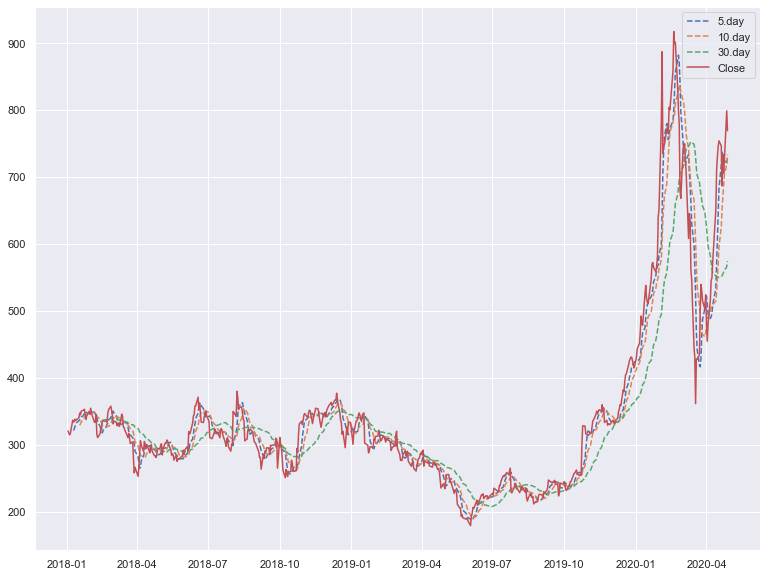

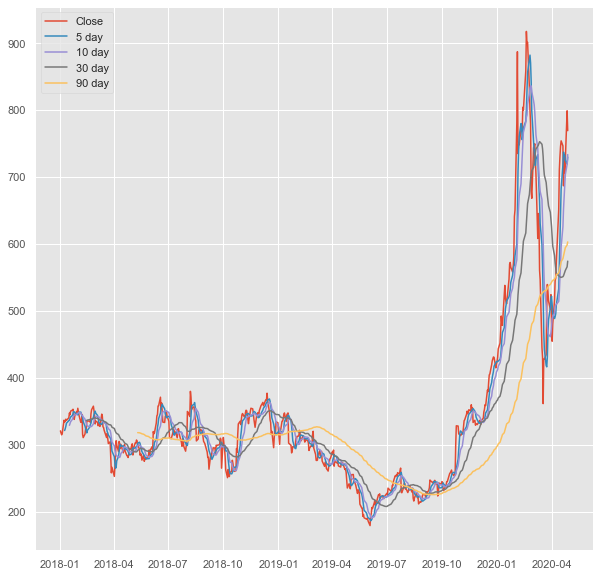

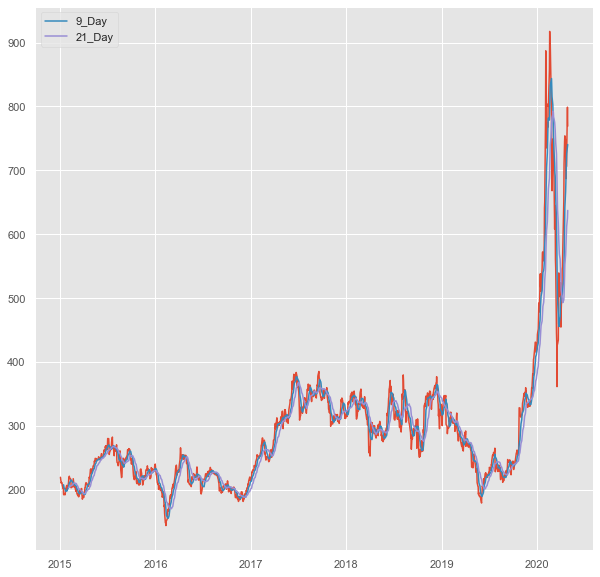

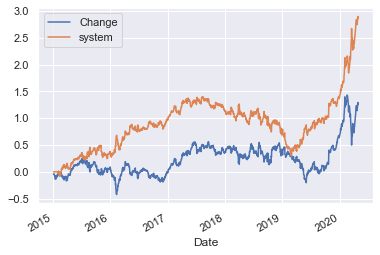

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

stock=wb.get_data_yahoo('TSLA',start='2018-01-01')
stock = stock.drop(['Adj Close','Volume','Open','Low','High'], axis=1)
#stock = stock.drop('Adj Close', axis=1)


### moving average
stock['5.day']=stock['Close'].rolling(5).mean().shift()
stock['MAD.5']=np.abs(stock['Close']-stock['5.day'])

stock['10.day']=stock['Close'].rolling(10).mean().shift()
stock['MAD.10']=np.abs(stock['Close']-stock['10.day'])

stock['30.day']=stock['Close'].rolling(30).mean().shift()
stock['MAD.30']=np.abs(stock['Close']-stock['30.day'])

stock['90.day']=stock['Close'].rolling(90).mean().shift()
stock['MAD.90']=np.abs(stock['Close']-stock['90.day'])


plt.figure(figsize=(13,10))
plt.plot(stock['5.day'],'--', label='5.day')
plt.plot(stock['10.day'],'--', label='10.day')
plt.plot(stock['30.day'],'--', label='30.day')
#plt.plot(stock['90.day'], label='90.day')
plt.plot(stock['Close'], label='Close')
plt.legend()
plt.show()

with plt.style.context('ggplot'):
    plt.figure(figsize=(10,10))
    plt.plot(stock.Close,label='Close')
    plt.plot(stock['5.day'], label='5 day')
    plt.plot(stock['10.day'], label='10 day')
    plt.plot(stock['30.day'], label='30 day')
    plt.plot(stock['90.day'], label='90 day')
    plt.legend()
    plt.show()

stock.tail()

import numpy as np
import pandas as pd
import pandas_datareader as pdr
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as ses

# PULL HISTORICAL DATA DAILY
stock=pdr.get_data_yahoo('TSLA',start='2015-01-01')
stock.drop(['Adj Close','Volume'], axis=1, inplace=True)

# RESAMPLE IN WEEKLY DATA
stock_W=pd.DataFrame(stock.resample('W').last())

# RESAMPLE IN MONTHLY DATA
stock_M=pd.DataFrame(stock.resample('M').last())


# MODEL WEEKLY DATASET
model = ses(stock_W['Close'])
model_fit_W=model.fit()
model_fit_W.predict()

# MODEL MONTHLY DATASET
model = ses(stock_M['Close'])
model_fit_M=model.fit()
model_fit_M.predict()

# WEEKLY
y_hat_W=model_fit_W.fittedvalues

# MONTHLY
y_hat_M=model_fit_M.fittedvalues

# MEAN ABSOLUTE DEVIATION NJMK,LO['/']
stock_W['W']=stock_W['Close'].rolling(5).mean().shift()
stock_W['MAD_W']=np.abs(stock_W['Close']-stock_W['W'])

stock_M['M']=stock_M['Close'].rolling(5).mean().shift()
stock_M['MAD_M']=np.abs(stock_M['Close']-stock_M['M'])

# MEAN PERCENT ERROR
stock_W['MAPE_W']=stock_W['MAD_W']/stock_W['Close']

stock_M['MAPE_M']=stock_M['MAD_M']/stock_M['Close']

# MEAN SQUARED ERROR
stock_W['MSE_W']=stock_W['MAD_W']**2
MSE_W=stock_W['MSE_W'].mean()

stock_M['MSE_M']=stock_M['MAD_M']**2
MSE_M=stock_M['MSE_M'].mean()

RMSE_W = np.sqrt(MSE_W)
RMSE_W

RMS_M = np.sqrt(MSE_M)
RMS_M

# WEEKLY
model_fit_W.params

# MONTHLY
model_fit_M.params

values= pd.DataFrame({'alpha': np.zeros(10), 'MSE_W': np.zeros(10)})
alpha=.1
for i in range(10):
    model=ses(stock_W['Close'])
    stock_W['Forecast']=model.fit(alpha).fittedvalues
    stock_W['MSE_W'].mean()
    values['alpha'][i]=alpha
    values['MSE_W'][i]=MSE_W
    alpha+=0.1
    
values_M= pd.DataFrame({'alpha': np.zeros(10), 'MSE_M': np.zeros(10)})
alpha_M=.1
for i in range(10):
    model_M=ses(stock_M['Close'])
    stock_M['Forecast']=model.fit(alpha).fittedvalues
    stock_M['MSE_M'].mean()
    values_M['alpha'][i]=alpha_M
    values_M['MSE_M'][i]=MSE_M
    alpha_M+=0.1
    
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as ses

df=pdr.get_data_yahoo('TSLA','2015-01-01')
df.drop(['Adj Close','Volume','High','Low','Open'], axis=1, inplace=True)


df['9day']=df['Close'].rolling(9).mean()
df['21day']=df['Close'].rolling(21).mean()
df['Change']=np.log(df.Close/df.Close.shift())


with plt.style.context('ggplot'):
    plt.figure(figsize=(10,10))
    plt.plot(df.Close)
    plt.plot(df['9day'], label='9_Day')
    plt.plot(df['21day'], label='21_Day')
    plt.legend(loc=2)
    plt.show
    
    
df['position']=np.where(df['9day']>df['21day'],1,0)
df['position']=np.where(df['9day']<df['21day'],-1,df['position'])

df['system']=df['position']*df['Change']
df[['Change','system']].cumsum().plot()

print('')

# Time Series Analysis and Forecasting

In [5]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import statsmodels.api as sm
import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib inline


df1=pdr.DataReader('WMT',data_source='yahoo',start='2012-1-3)
df1.to_csv(r'C:/Users/gordon/OneDrive/CODE/4_Data/1_FullBuilds/one.csv')
df = pd.read_csv(r'C:/Users/gordon/OneDrive/CODE/4_Data/1_FullBuilds/one.csv')


df['Date1']=df['Date']
df.set_index('Date1')
timeseries = df['Open']


timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()


from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Open'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(13, 8)


from statsmodels.tsa.stattools import adfuller

# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adf_check(df['Open'])

df['Open First Difference'] = df['Open'] - df['Open'].shift(1)

adf_check(df['Open First Difference'].dropna())

df['Open First Difference'].plot()
print('')

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Open First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Open First Difference'].iloc[13:], lags=40, ax=ax2)


model = sm.tsa.statespace.SARIMAX(df['Open'],order=(0,1,0), seasonal_order=(0,1,0,12))             
results = model.fit()          
print(results.summary())


df['forecast'] = results.predict(start = 1500, end= 2000, dynamic= True) 
df[['Open','forecast']].plot(figsize=(12,8))

plt.title('FORECAST!!!')
plt.ylabel('Price')
plt.xlabel('Date')

SyntaxError: EOL while scanning string literal (<ipython-input-5-3dfecedd85b1>, line 10)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
help(ARIMA)

* From the ETS decomposition, we can see that the Walmart stock prices follow a seasonal pattern and that there are both uptrends and downtrends in the trending pattern. The next step is to find out whether the dataset is stationary. To do this, we will define a method to check whether the time series data is stationary using the Dickey Fuller library, which is called adfuller. This is present in the statsmodels library. Based on the p value that's returned, we will decide whether the data is stationary or not. First, we will import the adfuller library or class and create a method, as shown in the following code segment:

* From the preceding output, we can see that the value of p is larger than 0.05, so we decide that the data is not stationary. To make the data stationary, we will follow the differencing technique, which we have already discussed. In differencing, the first difference of a time series is the series of changes from one period to the next. We take away this change by using a shift operation, which we can do easily with pandas. We can continue to take away the second difference, the third difference, and so on, until the data is stationary. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on, until your data is stationary

* After the first differencing, we will pass the new dataset column, Open First Difference, to the same method of the Dickey Fuller Test to see whether the data is stationary

* As you can see in the preceding output, we are now getting a p value that is much less than 0.05, so we can now consider the dataset as stationary. We then set the differencing (d) value in the Arima (p,d,q) model as one, as we have only observed one difference to establish whether the data is stationary.

* If we try to plot the Open First Difference, we will see the stationary pattern, as shown here:


* So far, we have found out the value of d in the ARIMA (p,d,q) model, which is the number of times we have to carry out the differencing. We now need to find the values of p and q, which are the lags for the AR and the MA models.

* To find the p and q parameters, we will be using ACF and PACF.

## Autocorrelation function 
* An autocorrelation plot (also known as a correlogram) shows the correlation of the series with itself, lagged by x time units. The y axis is the correlation, while the x axis is the number of time units of the lag.

* Imagine taking a time series of length T, copying it, and deleting the first observation of copy #1 and the last observation of copy #2. Now, you have two series of length T−1, for which you calculate a correlation coefficient. This is the value of the vertical axis at x=1 in your plots. It represents the correlation of the series lagged by one time unit. You go on and do this for all possible time lags x, and this defines the plot.

* Autocorrelation interpretation

* The actual interpretation of an autocorrelation plot and how it relates to ARIMA models can get a bit complicated, but there are some basic common methods we can use. Our main priority here is to try and figure out whether we will use the AR, MA, or both components of the ARIMA model, as well as how many lags we should use. In general, you would use either AR or MA; using both is less common.

## Partial autocorrelation (PACF)
* In general, a partial correlation is a conditional correlation. It is the correlation between two variables under the assumption that we know and take into account the values of another set of variables. For instance, consider a regression context in which y is the response variable and x1, x2, and x3 are predictor variables. The partial correlation between y and x3 is the correlation between the variables that specifies how both y and x3 are related to x1 and x2.

* Formally, this relationship is defined as follows:

# Valuing Securities with Pricing Models

In [ ]:
import numpy as np 
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

aapl=pdr.get_data_yahoo('AAPL','2015-01-01')

# EXPECTED RETURN OF AAPL
div = 2.92
pO=152.60
p1=178.71
er=(div+p1)/pO
print('Expected_Return {}'.format(er-1))
print('')
pv=(div+p1)/er
print('Current_Value:{}'.format(pv))

# DIVIDEND DISCOUNT MODEL
g=0.08
er=0.12
p1=81
div=3.0

horizon=pd.DataFrame({'div':np.zeros(3), 'exp_price':np.zeros(3)})
horizon.index=np.arange(1,len(horizon)+1)
horizon.index.name='Year'

for year in range(1,horizon['div'].count()+1):
    if year ==1:
        horizon['div'][year]=div
        horizon['exp_price'][year]=p1
    else:
        horizon['div'][year]=div*(1+g)**(year-1)
        horizon['exp_price'][year]=p1*(1+g)**(year-1)

(horizon['div'][1]+horizon['exp_price'][1])/(1+er)
horizon['div'][1]/(1+er)+(horizon['div'][2]+horizon['exp_price'][2])/(1+er)**2

# CONSTANT GROWTH MODEL
div=3
g=0.08
er=0.12
div/(er-g)

# WHAT ABOUT STOCKS WITH NO DIVIDENDS?
eps=5.6
pe=15.0
er=0.12
eps*pe/(1+er)
ea=5.30
ea*pe/(1.0+er)

###############################################
import numpy as np 
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

stocks='FB AMZN NFLX GOOG GLD'.split()
data=pdr.get_data_yahoo(stocks,'2014-01-01')['Close']
data=data.resample('BM').last()

data=data[:60]

change=pd.DataFrame()

for month in data:
    if month not in change:
        change[month]=np.log(data[month]).diff()

change.corr()

corr=change.corr()
corr['FB'].sort_values(ascending=False)

pd.plotting.scatter_matrix(change, diagonal='kde',figsize=(10,10))
print('')

# Multi-Factor Models

## Implementing the CAPM in Python

In [ ]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm


RISKY_ASSET = 'AMZN'
MARKET_BENCHMARK = '^GSPC'
START_DATE = '2015-03-20'
END_DATE = '2020-03-20'


df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True,
                 progress=False)


X = df['Adj Close'].rename(columns={RISKY_ASSET: 'asset', 
                                    MARKET_BENCHMARK: 'market'}) \
                   .resample('M') \
                   .last() \
                   .pct_change() \
                   .dropna()



covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance


y = X.pop('asset')
X = sm.add_constant(X)

capm_model = sm.OLS(y, X).fit()
print(capm_model.summary())



######################## Import Current Treasury Rates
N_DAYS = 90

df_rf = yf.download('^IRX', start=START_DATE, end=END_DATE)

rf = df_rf.resample('M').last().Close / 100

rf = ( 1 / (1 - rf * N_DAYS / 360) )**(1 / N_DAYS)  
rf = (rf ** 30) - 1 

rf.plot(title='Risk-free rate (13 Week Treasury Bill)')
print('')


import pandas_datareader.data as web

rf = web.DataReader('TB3MS', 'fred', start=START_DATE, 
                     end=END_DATE)

rf = (1 + (rf / 100)) ** (1 / 12) - 1

rf.plot(title='Risk-free rate (3-Month Treasury Bill)')
print('')

## Implementing 4 & 5 Factor Models In Python

In [ ]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web


get_available_datasets()[:5]


ff_dict = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                         start='2014-01-01')


ff_dict.keys()
print(ff_dict['DESCR'])


ff_dict[0].head()


### Import the libraries:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.formula.api as smf
import pandas_datareader.data as web


### Define the parameters:
ASSETS = ['AMZN', 'GOOG', 'AAPL', 'MSFT']
WEIGHTS = [0.25, 0.25, 0.25, 0.25]
START_DATE = '2009-12-31'
END_DATE = '2018-12-31'


### Download the factor-related data:
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 
                                 'famafrench', start=START_DATE)[0]
df_three_factor = df_three_factor.div(100)
df_three_factor.index = df_three_factor.index.format()


asset_df = yf.download(ASSETS,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)


### Calculate the monthly returns on the risky assets:
### &
### Calculate the portfolio returns:
asset_df = asset_df['Adj Close'].resample('M') \
                                .last() \
                                .pct_change() \
                                .dropna()
asset_df.index = asset_df.index.strftime('%Y-%m')


### Calculate the portfolio returns:
asset_df['portfolio_returns'] = np.matmul(asset_df[ASSETS].values, 
                                          WEIGHTS)


### Merge the datasets:
ff_data = asset_df.join(df_three_factor).drop(ASSETS, axis=1)
ff_data.columns = ['portf_rtn', 'mkt', 'smb', 'hml', 'rf']
ff_data['portf_ex_rtn'] = ff_data.portf_rtn - ff_data.rf


### Define a function for the rolling n-factor model:
def rolling_factor_model(input_data, formula, window_size):
    coeffs = []

    for start_index in range(len(input_data) - window_size + 1): 
        end_index = start_index + window_size

        ff_model = smf.ols(
            formula=formula,
            data=input_data[start_index:end_index]
        ).fit()
   
        coeffs.append(ff_model.params)

    coeffs_df = pd.DataFrame(
        coeffs, 
        index=input_data.index[window_size - 1:]
    )

    return coeffs_df


### Estimate the rolling three-factor model and plot the results:
MODEL_FORMULA = 'portf_ex_rtn ~ mkt + smb + hml'
results_df = rolling_factor_model(ff_data, 
                                  MODEL_FORMULA, 
                                  window_size=60)

results_df.plot(figsize=(10,8), title = 'Rolling Fama-French Three-Factor model')
print('')

# Quantitative Value Strategy

In [ ]:
########################################################################## LIBRARY IMPORT
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd
import pandas_datareader
from pandas_datareader import data as wb
import requests

##########################################################################
def get_fundamental_data(df):
    for symbol in df.index:

        url = ("http://finviz.com/quote.ashx?t=" + symbol.lower())
        soup = bs(requests.get(url).content)  # , features='html5lib')
        for m in df.columns:
            try:
                df.loc[symbol, m] = fundamental_metric(soup, m)
            except Exception as e:
                print(symbol, 'not found')
                print(e)
                break
    return df

def fundamental_metric(soup, metric):
    return soup.find(text=metric).find_next(class_='snapshot-td2').text

###################################################### Define A List Of Stocks And The Fundamental Metrics
stock_list = [
    'PTC','SAGE','NXST','AL','FICO','SYF','DFS','COF','ANIK','BA','TPL'
]

metric = ['Market Cap',
          'Income',
          'Dividend %',
          'P/B',
          'P/E',
          'Quick Ratio',
          'Current Ratio',
          'LT Debt/Eq',
          'Debt/Eq',
          'EPS (ttm)',
          'ROA',
          'ROE',
          'ROI',
          'Gross Margin',
          'Oper. Margin',
          'Target Price',
          '52W Range',
          'RSI (14)',
          'Perf Week',
          'Perf Month',
          'Perf Quarter',
          'Perf Half Y',
          'Perf Year',
          'Perf YTD',
          'Beta',
          'Volatility',
          'SMA20',
          'SMA50',
          'SMA200'
]

##########################################################################
df = pd.DataFrame(index=stock_list,columns=metric)
df = get_fundamental_data(df)

print('')
print("All stocks with fundamental data")

##########################################################################
#df.to_csv(r'C:/Users/Gordon D. Pisciotta/Desktop/test9.csv')
#new_df=pd.read_csv(r'C:/Users/Gordon D. Pisciotta/Desktop/test9.csv')

##########################################################################
df.columns = ['Tickers',
                 'Market Cap',
                 'Income',
                 'Dividend %',
                 'P/B',
                 'P/E',
                 'Quick Ratio',
                 'Current Ratio',
                 'LT Debt/Eq',
                 'Debt/Eq',
                 'EPS (ttm)',
                 'ROA',
                 'ROE',
                 'ROI',
                 'Gross Margin',
                 'Oper. Margin',
                 'Target Price',
                 '52W Range',
                 'RSI (14)',
                 'Perf Week',
                 'Perf Month',
                 'Perf Quarter',
                 'Perf Half Y',
                 'Perf Year',
                 'Perf YTD',
                 'Beta',
                 'Volatility',
                 'SMA20',
                 'SMA50',
                 'SMA200']

##########################################################################
df.sort_values("Perf Year", ascending=False, inplace = True) 

##########################################################################
df['Rank'] = range(1, 16)
df.set_index('Rank', inplace=True)
df

### Businesses which are quoted at low valuations
    ### P/E < 20
    ### P/B < 3
try:
    df = df[(df['P/E'].astype(float) < 20) & (df['P/B'].astype(float) < 3)]
except:
    pass
print("Stocks after screening")
df




### Businesses which have demonstrated earning power
    ###  EPS Q/Q > 10%
try:
    df['EPS Q/Q'] = df['EPS Q/Q'].map(lambda x: x[:-1])
    df = df[df['EPS Q/Q'].astype(float) > 10]
except:
    pass

print("Stocks after screening")
df



### Businesses earning good returns on equity while employing little or no debt
    ###  Debt/Eq < 1
    ### ROE > 10%
try:
    df['ROE'] = df['ROE'].map(lambda x: x[:-1])
    df = df[(df['Debt/Eq'].astype(float) < 1) & (df['ROE'].astype(float) > 10)]
except:
    pass

print("Stocks after screening")
df




### Management having substantial ownership in the business
    ### Insider own > 30%
try:
    df['Insider Own'] = df['Insider Own'].map(lambda x: x[:-1])
    df = df[df['Insider Own'].astype(float) > 30]
except:
    pass

print("Stocks after screening")
df

# BUY & SELL ORDER GENERATION:

In [ ]:
######################### BUY & SELL ORDER GENERATION:
############## Build df Columns for SMA & LMA

import yfinance as yf
from yahoofinancials import YahooFinancials
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime
import pandas as pd
import pandas_datareader as pdr

amzn=pd.DataFrame()
#ticker=input('Ticker: ')

ticker = ['PTC','SAGE','NXST','AL','FICO','SYF','DFS','COF','ANIK','BA','TPL']

start = datetime.datetime(1975,1,1)
end = datetime.date.today()

data = pdr.get_data_yahoo(ticker, start=start, end=end)
data.drop(['High','Low','Open','Close','Volume'], axis=1, inplace=True)
#amzn.head()


### Ratio Analysis
amzn_daily_close = data[['Adj Close']]
amzn_daily_pct_c = amzn_daily_close.pct_change()
amzn_daily_pct_c.fillna(0, inplace=True)

amzn_daily_pct_c = amzn_daily_close / amzn_daily_close.shift(1) - 1
amzn['Daily_S_RoR'] =a mzn_daily_pct_c['Adj Close']


### LOG Rate Of Return
amzn_daily_log_returns = np.log(amzn_daily_close.pct_change()+1)
amzn_daily_log_returns.head()
amzn['Daily_Log']=amzn_daily_log_returns['Adj Close']


### Monthly Return
monthly = amzn.resample('BM').apply(lambda x: x[-1])
#amzn['Monthly_RoR']=monthly['Adj Close']


### Quarterly Return
quarter = amzn.resample("4M").mean()
#amzn['Quarter_RoR']=quarter['Adj Close']


### Total Return
amzn_cum_daily_return = (1 + amzn_daily_pct_c).cumprod()
amzn['Total_RoR']=amzn_cum_daily_return['Adj Close']
amzn.rename(columns={'Adj Close': ticker}, inplace=True)


amzn_cum_monthly_return = amzn_cum_daily_return.resample("M").mean()
#amzn_cum_monthly_return

adj_close_px = amzn[ticker]
moving_avg = adj_close_px.rolling(window=40).mean()
#moving_avg[-10:]


amzn['SMA_S'] = adj_close_px.rolling(window=21).mean()
amzn['SMA_M'] = adj_close_px.rolling(window=126).mean()
amzn['SMA_L'] = adj_close_px.rolling(window=252).mean()

amzn[[ticker, 'SMA_S', 'SMA_M', 'SMA_L']].plot(figsize=(10, 8))
plt.ylabel('Price')
plt.title('Asset Price over-time vs S/M/L Moving Avg')

min_periods = 75 
vol = amzn_daily_pct_c.rolling(min_periods).std() * np.sqrt(min_periods) 
vol.plot(figsize=(10, 8))
plt.ylabel('Daily Volume In Percent ')
plt.title('Asset Daily Volume In Percent vs Time')

amzn_cum_daily_return.plot(figsize=(12,8))
plt.title('AMZN CUMULATIVE DAILY RETURN %')
plt.xlabel('DATE')
plt.ylabel('RoR %')

plt.show()
amzn.tail()

############################################################### Build df Columns for SMA & LMA
short_window = 30
long_window = 90
signals = pd.DataFrame(index=amzn.index)
signals['signal'] = 0.0
signals['short_mavg'] = amzn[ticker].rolling(window=short_window,
                                              min_periods=1, 
                                              center=False).mean()
signals['long_mavg'] = amzn[ticker].rolling(window=long_window, 
                                             min_periods=1, 
                                             center=False).mean()
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 
                                            1.0, 0.0) 
signals['positions'] = signals['signal'].diff()


### SIGNALS
signals=signals.replace({'signal': {1.0: 'Buy', 0.0: 'Sell'}})
signals['count']=signals.loc[signals.signal == 'Buy', ['count']] = 1.0
signals['count']=signals.loc[signals.signal == 'Sell', ['count']] = -1.0


### .............
fig = plt.figure(figsize=(11, 8))
ax1 = fig.add_subplot(111,  ylabel='Price in $')

amzn[ticker].plot(ax=ax1, color='g', lw=1)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='k')
         
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='r')

plt.title('BUY & SELL ORDERS - STOCK')
plt.legend()
plt.show()

signals.tail()

######################################################## Evaluate Short Moving Average(SMA) vs Long Moving Average
short_window = 21
long_window = 63
signals = pd.DataFrame(index=amzn.index)
signals['signal'] = 0.0
signals['short_mavg'] = amzn[ticker].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = amzn[ticker].rolling(window=long_window, min_periods=1, center=False).mean()
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0) 
signals['positions'] = signals['signal'].diff()


## Set Portfolio 
initial_capital= float(50000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['stock'] = 50*signals['signal']   
portfolio = positions.multiply(amzn[ticker], axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(amzn[ticker],
                                            axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital -(pos_diff.multiply(amzn[ticker],
                                                        axis=0)).sum(axis=1).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()


### SHARPE RATIO
returns = portfolio['returns']
portfolio_ror=np.sqrt(252) * (returns.mean() / returns.std())


### CONSTRUCT ORDERS
amzn_cum_daily_return.plot(figsize=(12,8))
plt.title(str(ticker)+' CUMULATIVE DAILY RETURN %')
plt.xlabel('DATE')
plt.ylabel('RoR %')

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='k')

ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='r')

plt.title('Total Portfolio Movement With Buy/Sell Orders')
plt.show()

print ("The Sharpe Ratio of "+ticker+" = "+"{0:.2%}".format(portfolio_ror))
print('')
portfolio.tail()


############################################################ Demo
import quandl
import yfinance as yf
from yahoofinancials import YahooFinancials
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pandas_datareader as pdr


### ............
ticker=ticker
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

amzn = pdr.get_data_yahoo(ticker, 
                          start=start,
                          end=end)
amzn.drop(['High','Low','Open','Adj Close'],
          axis=1, inplace=True)


### ...........
fig = plt.figure(figsize=(9,6))
plt.subplot(211)
plt.plot(amzn['Close'])
plt.title(str(ticker)+' Price Movements')
plt.ylabel('Date')
plt.xlabel('Price')
plt.show()

fig = plt.figure(figsize=(9,6))
plt.subplot(212)
plt.plot(amzn['Volume'], color='r')
plt.title(str(ticker)+' Volume')
plt.ylabel('Volume')
plt.xlabel('Date')

plt.show()
amzn.tail()



# Moving Average Technical Analysis with Python
* Calculating and Plotting Moving Averages with Python

- https://towardsdatascience.com/moving-average-technical-analysis-with-python-2e77633929cb

## What are Moving Averages?
A moving average is the mean of the n last closing prices. The number of last closing prices n to select depends on the investor or analyst performing the analysis. A common approach is to take 20 days which are basically the number of trading days in a month.
The shorter the number of days, the more sensitive the moving average will be to price changes. That is, if we select a bigger number of days, the short term fluctuations will not be reflected in the indicator. However, by selecting a large number of days, we may miss some upcoming price changes due to overlooking short term fluctuations.
Below we can see how the simple moving average is calculated (source Investopedia).

## How to interpret Moving Averages and Crossovers
Financial analysts and investors can use moving averages to analyse price trends and predict upcoming change of trends. During a price uptrend, price is higher than moving averages. While in a price downtrend, prices are lower than moving averages. When closing price crosses the moving average, it can be seen by Investors as potential change in the price trend.
We may use multiple moving averages for different periods together. For example, we may have a short term moving average of 20 days and a long term moving average of 250 days. An indication of price trend change may be when the short term moving average is crossing the long term moving average:
When the short term moving average crosses above the long term moving average, this may indicate a buy signal. This is known as a golden cross.
Contrary, when the short term moving average crosses below the long term moving average, it may be a good moment to sell. This is known as a dead cross.

## Moving Average Technical Analysis using Python
Now that we understand how to calculate and interpret moving averages, we are ready to build this technical analysis tool with Python. Our goal is to have a script in which we will pass any company that we want to analyse and our function will:
First, download stock price information from a free API financial source named financialmodeliongprep.
Second, we will parse the result from the API and convert it into a Pandas DataFrame containing the date and the closing price for the last 1200 trading days.
Third, we will calculate the 20 and 250 days moving averages.
Finally, we will conclude our Moving Average Technical Analysis by plotting the closing price and moving averages together in a matplotlib graph.
The first thing we need to do is to import all required packages, create our stockpriceanalysis function and make an http request to the API end point to get the closing prices from the last few years.
We will use Apple as an example. Note that the API endpoint url takes as a parameter the ticker of the company that we want to get the data for. In our case, it will be the argument that we pass to our function (e.g. aapl for Apple).
Then, we can parse the response and keep only the last 1200 days of prices Please check the following article if you want to know more in detail how to parse and deal with the API response.
Now, we have a dictionary in the stockprices variable containing 1200 data points with the date and the closing price. We convert it into a Pandas DataFrame using the pd.DataFrame.from_dict() method and set the date as index.

## Plotting the Moving Averages
Now that we have calculated the closing price, 20 and 250 days moving averages, we can plot them in a single chart using matplotlib. Then, we add a title and make the axis tight in order to enhance the plot layout.

### NOTES:
* If we run the stock priceanalysis function and pass the Apple stock ticker as an argument, we will get a graph with the Apple moving averages and closing prices for the last few months:

### NOTES:
* By looking into the graph, we can see the result of our Moving Average Technical Analysis for Apple.
* We can observe a crossover between the 20 day moving average and the latest closing price. This is a good indication that the upward trend is over and that a downward price trend is starting.
* Further analysis should be done using fundamental tools in order to corroborate this potential trend price change. In some of my previous posts, you can find out some fundamental financial analysis tools using Python.

### Wrapping Up
* We have built a very powerful tool to perform a simple Technical Analysis with Python using Moving Averages for 20 and 250 days. The script can be used to perform the analysis for other companies by simple passing the company ticker as the argument of our function.

In [ ]:
#############################################
import requests
import pandas as pd
import matplotlib.pyplot as plt


def stockpriceanalysis(stock):
    stockprices = requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/{stock}?serietype=line")
    stockprices = stockprices.json()

#Parse the API response and select only last 1200 days of prices
    stockprices = stockprices['historical'][-1200:]

#Convert from dict to pandas datafram

    stockprices = pd.DataFrame.from_dict(stockprices)
    stockprices = stockprices.set_index('date')
    #20 days to represent the 22 trading days in a month
    stockprices['20d'] = stockprices['close'].rolling(20).mean()
    stockprices['250d'] = stockprices['close'].rolling(250).mean()
  
    stockprices[['close','20d','250d']].plot(figsize=(10,4))
    plt.grid(True)
    plt.title(stock + ' Moving Averages')
    plt.axis('tight')
    plt.ylabel('Price')
    
stockpriceanalysis('aapl')

# Assumptions of Markowitz's theory
* Investors are rational and act in a way to increase a given level of income.
* Financial specialists have free access to up-to-date data and revise this data based on the returns and risk.
* The market sectors are effective and assimilate the data rapidly and flawlessly.
* Financial specialists are risk-averse and attempt to limit risk and amplify return.
* Speculators make choices in light of the expected returns and the standard deviation from the means of these profits.
* Investors would always choose a higher return over a lower return.


## Parameter

##### LOG Returns (Daily Mean & Annual)
##### COVARIANCE
##### CORRELATION
##### ASSESS TOTAL NUMBER OF ASSETS
##### ASSIGN WEIGHTS TO POSITIONS

In [ ]:
############################################# Obtaining the efficient frontier in Python – part 1

### LIBRARY IMPORT
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

### Define the parameters:
ASSETS = ['WMT', 'FB']
START_DATE = '2015-03-20'
END_DATE = '2020-03-20'

### DATA PULL
df = yf.download(ASSETS, start=START_DATE, end=END_DATE, adjusted=True, progress=False)
df=df['Adj Close']

### PLOTTING DATA
df.index=pd.to_datetime(df.index)
(df / df.iloc[0] * 100).plot(figsize=(11, 6))
plt.title('WMT VS FB')
plt.show()


### DEFINE AND CALCULATE PARAMETERS/RETURNS/RATIOS - Obtaining the efficient frontier in Python – part 2
log_returns = np.log(df/ df.shift(1))
annual_log_returns = log_returns.mean() * 250
covariance = log_returns.cov() * 250
correlation = log_returns.corr()
num_assets = len(ASSETS)
arr1 = np.random.random(2)
arr = arr1[0]+arr1[1]
weights = np.random.random(num_assets)
weights /= np.sum(weights)

df

######################## 
### Annual Return based on Weight of Asset In Portfolio 
Annual_Weighted_Return = round(np.sum(weights * log_returns.mean())* 250,4)
print('Annual Return based on Weight of Asset In Portfolio '+str(Annual_Weighted_Return))

### Expected Portfolio Variance
est_Portfolio_Var = round(np.dot(weights.T,np.dot(log_returns.cov()* 250,weights)),4)
print('Expected Portfolio Variance = '+str(est_Portfolio_Var))

### Expected Portfolio Volatility
est_Portfolio_Vol = round(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()* 250,weights))),4)
print('Expected Portfolio Volatility = '+str(est_Portfolio_Vol))


### PORTFOLIO_RETURNS   vs   PORTFOLIO_VOLATILITY
portfolio_returns=[]
portfolio_volatilities=[]
for x in range(1000):
    weights=np.random.random(num_assets)
    weights/=np.sum(weights)
    portfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,
                                                 np.dot(log_returns.cov(),weights))))

portfolio_returns=np.array(portfolio_returns)
portfolio_volatilities=np.array(portfolio_volatilities)


###################################### Obtaining the efficient frontier in Python – part 3
portfolios=pd.DataFrame({'Return': portfolio_returns,'Volatility':portfolio_volatilities})

### PLOT THE EFFICIENT FRONTIER
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Markowitz Efficient Frontier')

plt.show()

# Markowitz Portfolio Optimization

* Markowitz Portfolio theory – One of the main pillars of modern Finance
* Obtaining the Efficient Frontier in Python – Part I
* Obtaining the Efficient Frontier in Python – Part II
* Obtaining the Efficient Frontier in Python – Part III

In [ ]:
########################### Obtaining the Efficient Frontier - Part I
### DATA PULL
assets = ['PG','^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']

(pf_data / pf_data.iloc[0]*100).plot(figsize = (10,5))

log_returns = np.log(pf_data / pf_data.shift(1))
Annual_log_returns = log_returns.mean()*250
Annual_Cov = log_returns.cov()*250
Corr = log_returns.corr()


num_assets = len(assets)
arr = np.random.random(2)
ARR = arr[0] + arr[1]


weights = np.random.random(num_assets)
weights /= np.sum(weights)
WEIGHTS = weights[0] + weights[1]

print('Annual_log_returns = ')
print(Annual_log_returns)
print('')
print('Annual_Cov = ')
print(Annual_Cov)
print('')
print('Corr = ')
print(Corr)
print('')
print('ARR = ')
print(ARR)
print('')
print('WEIGHTS = ')
print(WEIGHTS)


################################################# Obtaining the Efficient Frontier–Part II
### EXPECTED PORTFOLIO RETURN:
port_est_ror = np.sum(weights * log_returns.mean())*250
print('EXPECTED PORTFOLIO RETURN = ' + f'{port_est_ror:%}')


### EXPECTED PORTFOLIO VARIANCE
port_est_var = np.dot(weights.T, np.dot(log_returns.cov()*250, weights))
print('EXPECTED PORTFOLIO VARIANCE = ' + f'{port_est_var:%}')


### EXPECTED PORTFOLIO VOLATILITY
port_est_vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))
print('EXPECTED PORTFOLIO VOLATILITY = ' + f'{port_est_vol:%}')


pfolio_returns =[]
pfolio_volatilities =[]

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, 
                                              np.dot(log_returns.cov()*250,weights))))
#pfolio_returns, pfolio_volatilities


pfolio_returns =[]
pfolio_volatilities =[]

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, 
                                              np.dot(log_returns.cov()*250,weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)   
#pfolio_returns, pfolio_volatilities



################################ Obtaining the Efficient Frontier – Part III
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})


### PLOT THE EFFICIENT FRONTIER
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Markowitz Efficient Frontier')
plt.show()

# Monte Carlo Simulations For Decision-Making

* Monte Carlo = MC
* The essence of Monte Carlo simulations
* Monte Carlo applied in a Corporate Finance context
* Monte Carlo: Predicting Gross Profit – Part I
* Monte Carlo: Predicting Gross Profit – Part II
* Forecasting Stock Prices with a Monte Carlo Simulation
* Monte Carlo: Forecasting Stock Prices - Part I
* Monte Carlo: Forecasting Stock Prices - Part II
* Monte Carlo: Forecasting Stock Prices - Part III
* An Introduction to Derivative Contracts
* The Black Scholes Formula for Option Pricing
* Monte Carlo: Black-Scholes-Merton
* Monte Carlo: Euler Discretization - Part I
* Monte Carlo: Euler Discretization - Part II

## Monte Carlo: Predicting Gross Profit

In [ ]:
######################################### MC: Predicting Gross Profit – Part I
import numpy as np
import matplotlib.pyplot as plt

rev_m = 170
rev_stdev = 20
iterations = 1000

rev = np.random.normal(rev_m, rev_stdev, iterations)


plt.figure(figsize = (15, 6))
plt.plot(rev)
plt.show()

# COGS ~= aprox. 60% of revenues
# of that 60% we expect it will fall within 10% std

COGS = - (rev * np.random.normal(0.6, 0.1))

plt.figure(figsize=(15, 6))
plt.plot(COGS)
plt.show()


print('COGS MEAN = ')
print(COGS.mean())
print('')
print('COGS Std = ')
print(COGS.std())


######################################## MC: Predicting Gross Profit – Part II
Gross_Profit = rev + COGS
Gross_Profit

plt.figure(figsize=(15, 6))
plt.plot(Gross_Profit)
plt.show()

print('Max Gross Profit:')
print(max(Gross_Profit))
print('')
print('Min Gross Profit:')
print(min(Gross_Profit))
print('')
print('Mean Gross Profit:')
print(Gross_Profit.mean())
print('')
print('Std Gross Profit:')
print(Gross_Profit.std())
print('')

plt.figure(figsize=(10, 6))
plt.hist(Gross_Profit, bins = [40, 50, 60, 70, 80, 90, 100, 110, 120]);
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(Gross_Profit, bins = 20);
plt.show()

## Monte Carlo: Forecasting Stock Prices

In [ ]:
################################### MC: Forecasting Stock Prices - Part I
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

ticker = 'PG'
data1 = pd.DataFrame()
data1[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

### LOG RETURN    
log_return1 = np.log(1+data1.pct_change())

data1.plot(figsize=(10, 6));
log_return1.plot(figsize=(10, 6))

u = log_return1.mean()
var = log_return1.var()
drift = u - (0.5 * var)
stdev = log_return1.std()

print('u =')
print(u)
print('')

print('var =')
print(var)
print('')

print('drift =')
print(drift)
print('')

print('stdev =')
print(stdev)
print('')



################################# MC: Forecasting Stock Prices - Part III
### SETTING UP NUMPY ARRAY
np.array(drift)
drift.values
stdev.values
norm.ppf(0.95)
x = np.random.rand(10, 2)
norm.ppf(x)
Z = norm.ppf(np.random.rand(10, 2))

t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,
                                                                             iterations)))

###...
S0 = data1.iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list[0] = S0

for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]
    
plt.figure(figsize=(10, 6))
plt.plot(price_list);

## MC: Forecasting Stock Prices – part 1
* In this section, we will be gaining further knowledge on how to implement Monte Carlo simulations in the real world. Here, we will be looking at how we can run or implement simulations, which, in turn, will help us to predict the stock price of any company.

* First, we will import all the important libraries that we have already used, as shown here:

## MC: Forecasting Stock Prices – Part 2
* In the previous section, we obtained the values of the drift and standard deviation, which we need to calculate the daily returns.

* We will be using a type() function, which allows us to check the drift variable datatype and see it as a pandas series.

* The code to check the type of drift variable that was computed in the previous section is as follows:

## MC: Forecasting Stock Prices - Part III
* In this section, we need to create a price list. Each price must equal the price of the product that was observed the previous day, as shown here:

* St= S0 . daily_returnt

* St+1 = St . daily_returnt+1 


* St+999 = St+998 . daily_returnt+999 

* Once we calculate the price of the stock at the date specified by t, we can predict the price of the stock at the date specified by t+1. This process will then continue 1,000 times, giving us predictions of the stocks for 1,000 days in the future. 

* We have already created a matrix that contains the daily returns (daily_returns), so the daily_returns variable is available. The question remains, however, whether the first price in the list will be 0 or $1 million.

* To make useful predictions, the first stock price in our list must be considered or initialized as the last one in the dataset. This is called the current market price. We will call this variable S0 and it will contain the stock price of the starting day, specified as t0. The last piece of data can be retrieved using the iloc operator that's present in the pandas library, as shown here:



In [ ]:
##################### Using Monte Carlo simulation to forecast stock prices – part 1
### LIBRARY IMPORT
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import norm
%matplotlib inline

### DATA IMPORT
ticker = 'MSFT'
data1 = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2000-1-1')['Adj Close']

### CALCULATE RETURNS
log_returns = np.log(1 + data.pct_change())
print(log_returns.tail())

### PLOT RESULTS
data.plot(figsize=(10, 6));
plt.title('MSFT Price')
log_returns.plot(figsize = (10, 6))
plt.title('MSFT Daily LOG Returns')
plt.show()


### Brownian Motion
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

print('u = '+str(u))
print('')
print('var = '+str(var))
print('')
print('drift = '+str(drift))
print('')
print('stdev = '+str(stdev))


############################## Monte Carlo Simulation To Forecast Stock Prices – Part 2
type(drift)
type(stdev)
np.array(drift)
drift.values

stdev.values

norm.ppf(0.95)

x = np.random.rand(10, 2)

norm.ppf(x)

Z = norm.ppf(np.random.rand(10,2))

t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + \
                       stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

############################## Monte Carlo Simulation To Forecast Stock Prices – Part  3
S0 = data.iloc[-1]

# The preceding price is the first stock price that we will enter in the list.
    # Then we will insert the other stock prices. This list should have the same 
    # size as that of the daily_returns array. The stock price list will be equal
    # to that of the daily_returns array size.

# We will be using a method which is zeros_like() within the NumPy library, 
    #which will be used to create an array. The code is as follows:

price_list = np.zeros_like(daily_returns)


# From the preceding output, we have obtained an array of 1,000 by 10 elements,
    # similar to the dimensions of the daily returns, that we can now fill with zeros.
    # This step is necessary to replace all the zero values with the expected stock prices.
    # First, we must set the first row of our price list to S0. Note that S0 will be the
    # initial value for each of the 10 iterations we intend to generate. 
    # The code is as follows:
    
price_list[0] = S0


# We can now create our stock price list, wherein we will run a loop from
    # day 1 to the 1000th day. The expected price of the stock on any day t 
    # will be calculated as stock price at t-1 times the daily returns observed on day t.
    # The code is as follows:
    
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

plt.figure(figsize=(10,6))
plt.plot(price_list);
print('From the preceding output, we will obtain 10 possible paths of the expected \
stock price of Microsoft (MSFT), starting from the last day present in the dataset. \
We call these trends iterations, since we iterated through the provided formula 10 times. \
Here, we have the paths that we simulated.')




## Monte Carlo simulations in finance

### Simulating stock price dynamics using Geometric Brownian Motion

#### How to do it...
1. Import libraries
2. Define parameters for downloading data
3. Download data from Yahoo Finance:
4. Calculate daily returns:
5. Split data into the training and test sets:
6. Specify the parameters of the simulation:
7. Define the function used for simulations:
8. Run the simulations:
9. Plot simulation results:

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import yfinance as yf


### 2. Define parameters for downloading data:
RISKY_ASSET = 'MSFT'
START_DATE = '2019-03-20'
END_DATE = '2020-03-20'


### 3. Download data from Yahoo Finance:
df = yf.download(RISKY_ASSET, start=START_DATE, 
                 end=END_DATE, adjusted=True)
print(f'Downloaded {df.shape[0]} rows of data.')


### 4. Calculate daily returns:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()

ax = returns.plot()
ax.set_title(f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}', 
             fontsize=16)

plt.tight_layout()
#plt.savefig(r'C:/Users/Gordon D. Pisciotta/OneDrive/Desktop/NOTEBOOKS/temp/images/ch6_im1.png')
plt.show()

print(f'Average return: {100 * returns.mean():.2f}%')


### 5. Split data into the training and test sets:
train = returns['2019-03-20':'2020-01-31']
test = returns['2020-02-01':'2030-03-20']


### 6. Specify the parameters of the simulation:
T = len(test)
N = len(test)
S_0 = adj_close[train.index[-1].date()]
N_SIM = 100
mu = train.mean()
sigma = train.std()



### 7. Define the function used for simulations:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, 
                 random_seed=42):
    '''
    Function used for simulating stock returns using Geometric Brownian Motion.
    
    Parameters
    ------------
    s_0 : float
        Initial stock price
    mu : float
        Drift coefficient
    sigma : float
        Diffusion coefficient
    n_sims : int
        Number of simulations paths
    dt : float
        Time increment, most commonly a day
    T : float
        Length of the forecast horizon, same unit as dt
    N : int
        Number of time increments in the forecast horizon
    random_seed : int
        Random seed for reproducibility

    Returns
    -----------
    S_t : np.ndarray
        Matrix (size: n_sims x (T+1)) containing the simulation results. 
        Rows respresent sample paths, while columns point of time.
    '''
    np.random.seed(random_seed)
    
    dt = T/N
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    
    S_t = s_0 * np.exp((mu - 0.5 * sigma**2) * time_steps 
                       + sigma * W)
    S_t = np.insert(S_t, 0, s_0, axis=1)
    
    return S_t


### 8. Run the simulations:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)


### 9. Plot simulation results:
# prepare objects for plotting 
last_train_date = train.index[-1].date()
first_test_date = test.index[0].date()
last_test_date = test.index[-1].date()
plot_title = (f'{RISKY_ASSET} Simulation '
              f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), 
                                  index=index)

# plotting
ax = gbm_simulations_df.plot(alpha=0.2, legend=False)
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('mean', 'actual'))

plt.tight_layout()
#plt.savefig(r'C:/Users/Gordon D. Pisciotta/OneDrive/Desktop/NOTEBOOKS/temp/images/ch6_im2.png')
plt.show()

# Analysis of Stock Market Cycles with fbprophet package in Python
## stock market cycles 
* are the long-term price patterns of stock markets and are often associated with general business cycles. They are key to technical analysis where the approach to investing is based on cycles or repeating price patterns. If we have better understanding toward the cycles of stock market, we can always buy with relative low-price and sell at relative high price in each cycle, and we’ll always have positive return. What a wonderful world! Of course, there is no superior strategy in stock market which can make money forever, but fbprophet package in Python or R can help us look deeper into the hidden cycles in stock market. In this analysis, we can take a look at how fbprophet can assist us to make an investment decision, and all codes are available from here.
## Introduction to fbprophet
* Fbprophet is an open source released by Facebook in order to provide some useful guidance for producing forecast at scale. By default, it would divide a time series into trend and seasonality, which might contain yearly, weekly and daily. However, analysts can define their own seasonality. To get better understanding about the package, the document from Prophet is really helpful.
* One of the feature for package is its simplicity and flexibility. Since cycles in stock market we want to figure out are not limited to yearly, weekly or daily, we should define our own cycles and find out which can fit the data better. Besides, we should not use weekly seasonality since there is no trading on weekend. We can also define our ‘self_define_cycle’ by add_seasonality function. All the settings can be done with only two lines of code.

## REFERENCES:
* https://towardsdatascience.com/analysis-of-stock-market-cycles-with-fbprophet-package-in-python-7c36db32ecd0
* https://barrypan.github.io/Fbprophet_ANA/Final_Analysis.html

## Summary
With the help of Python and fbprophet package, we can have better understanding toward the stock market. Taking Costco as an example, we can find a cycle with 252 days so that it can generate enough return and have a good fit of data. According to the cycle we found, we can have about 23% return for 3 years. Perhaps this investment strategy cannot satisfy what you want, but you can always set your own approaches based on your knowledge and experience. Powerful fbprophet package can make your analysis on stock market much deeper and easier.

In [ ]:
### LIBRARY IMPORT
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error


# SET PARAMETERS:
ticker = "COST"
start_date = '2015-03-20'
end_date = '2020-03-20'


### DATA PULL 
stock_data = data.DataReader(ticker, 'yahoo', start_date, end_date)
print (stock_data.shape)
stock_data.head()


### DATA PLOT
stock_data['Close'].plot(figsize=(16,8),color='#002699',alpha=0.8)
plt.xlabel("Date",fontsize=12,fontweight='bold',color='gray')
plt.ylabel('Price',fontsize=12,fontweight='bold',color='gray')
plt.title("Stock price for Costco",fontsize=18)
plt.show()

# The Complete Guide to Time Series Analysis and Forecasting


* Understand moving average, exponential smoothing, stationarity, autocorrelation, SARIMA, and apply these techniques in two projects.
- https://github.com/marcopeix/stock-prediction/blob/master/Stock%20Prediction.ipynb

##  Predicting stock price
* We will use the historical stock price of the New Germany Fund (GF) to try to predict the closing price in the next five trading days.
* You can grab the dataset and notebook here.
* As always, I highly recommend you code along! Start your notebook, and let’s go!

In [ ]:
### LIBRARY IMPORT
from datetime import datetime
from iexfinance.stocks import get_historical_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
import warnings
warnings.filterwarnings('ignore')


def mean_absolute_percentage_error(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true))
    

### DATA PULL
start = datetime(2017, 1, 1)
end = datetime(2018, 1, 1)

df = wb.DataReader('TSLA','yahoo', start, end)
data=pd.DataFrame(df)

# drop_cols = ['ADJ_CLOSE', 'ADJ_LOW', 'ADJ_HIGH', 'ADJ_OPEN', 'VOLUME', 'FREQUENCY', 'TYPE', 'FIGI']
# data.drop(drop_cols, axis=1, inplace=True)

plt.figure(figsize=(17, 8))
plt.plot(data.Close)
plt.title('Closing price of TSLA')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()


def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
    
#Smooth by the previous 5 days (by week)
plot_moving_average(data.Close, 5)

#Smooth by the previous month (30 days)
plot_moving_average(data.Close, 30)

#Smooth by previous quarter (90 days)    
plot_moving_average(data.Close, 90, plot_intervals=True)

# Exponential_smoothing
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
    
plot_exponential_smoothing(data.Close, [0.05, 0.3])


### double_exponential_smoothing:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(data.Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])


### tsplot:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.Close, lags=30)

data

## ...
Whether we wish to predict the trend in financial markets or electricity consumption, time is an important factor that must now be considered in our models. For example, it would be interesting to forecast at what hour during the day is there going to be a peak consumption in electricity, such as to adjust the price or the production of electricity.
Enter time series. A time series is simply a series of data points ordered in time. In a time series, time is often the independent variable and the goal is usually to make a forecast for the future.
However, there are other aspects that come into play when dealing with time series.
Is it stationary?
Is there a seasonality?
Is the target variable autocorrelated?
In this post, I will introduce different characteristics of time series and how we can model them to obtain accurate (as much as possible) forecasts.

## Autocorrelation
- Informally, autocorrelation is the similarity between observations as a function of the time lag between them.

- Above is an example of an autocorrelation plot. Looking closely, you realize that the first value and the 24th value have a high autocorrelation. Similarly, the 12th and 36th observations are highly correlated. This means that we will find a very similar value at every 24 unit of time.

- Notice how the plot looks like sinusoidal function. This is a hint for seasonality, and you can find its value by finding the period in the plot above, which would give 24h.

## Seasonality
- Seasonality refers to periodic fluctuations. For example, electricity consumption is high during the day and low during night, or online sales increase during Christmas before slowing down again.

- As you can see above, there is a clear daily seasonality. Every day, you see a peak towards the evening, and the lowest points are the beginning and the end of each day.

- Remember that seasonality can also be derived from an autocorrelation plot if it has a sinusoidal shape. Simply look at the period, and it gives the length of the season.

## Stationarity
- Stationarity is an important characteristic of time series. A time series is said to be stationary if its statistical properties do not change over time. In other words, it has constant mean and variance, and covariance is independent of time.

- Looking again at the same plot, we see that the process above is stationary. The mean and variance do not vary over time.

- Often, stock prices are not a stationary process, since we might see a growing trend, or its volatility might increase over time (meaning that variance is changing).
- Ideally, we want to have a stationary time series for modelling. Of course, not all of them are stationary, but we can make different transformations to make them stationary.

## How to test if a process is stationary
- You may have noticed in the title of the plot above Dickey-Fuller. This is the statistical test that we run to determine if a time series is stationary or not.

- Without going into the technicalities of the Dickey-Fuller test, it test the null hypothesis that a unit root is present.
- If it is, then p > 0, and the process is not stationary.
- Otherwise, p = 0, the null hypothesis is rejected, and the process is considered to be stationary.
- As an example, the process below is not stationary. Notice how the mean is not constant through time.

## Modelling time series
There are many ways to model a time series in order to make predictions. Here, I will present:
- moving average
- exponential smoothing
- ARIMA

## Moving average
- The moving average model is probably the most naive approach to time series modelling. This model simply states that the next observation is the mean of all past observations.
- Although simple, this model might be surprisingly good and it represents a good starting point.
- Otherwise, the moving average can be used to identify interesting trends in the data. We can define a window to apply the moving average model to smooth the time series, and highlight different trends.
- In the plot above, we applied the moving average model to a 24h window. The green line smoothed the time series, and we can see that there are 2 peaks in a 24h period.
- Of course, the longer the window, the smoother the trend will be. Below is an example of moving average on a smaller window.

## Exponential smoothing
- Exponential smoothing uses a similar logic to moving average, but this time, a different decreasing weight is assigned to each observations. In other words, less importance is given to observations as we move further from the present.
- Mathematically, exponential smoothing is expressed as:

- Here, alpha is a smoothing factor that takes values between 0 and 1. It determines how fast the weight decreases for previous observations.

- From the plot above, the dark blue line represents the exponential smoothing of the time series using a smoothing factor of 0.3, while the orange line uses a smoothing factor of 0.05.
- As you can see, the smaller the smoothing factor, the smoother the time series will be. This makes sense, because as the smoothing factor approaches 0, we approach the moving average model.

## Double exponential smoothing
- Double exponential smoothing is used when there is a trend in the time series. In that case, we use this technique, which is simply a recursive use of exponential smoothing twice.

## Seasonal autoregressive integraded moving average model (SARIMA)
- SARIMA is actually the combination of simpler models to make a complex model that can model time series exhibiting non-stationary properties and seasonality.
- At first, we have the autoregression model AR(p). This is basically a regression of the time series onto itself. Here, we assume that the current value depends on its previous values with some lag. It takes a parameter p which represents the maximum lag. To find it, we look at the partial autocorrelation plot and identify the lag after which most lags are not significant.
- Then, we add the moving average model MA(q). This takes a parameter q which represents the biggest lag after which other lags are not significant on the autocorrelation plot.
- After, we add the order of integration I(d). The parameter d represents the number of differences required to make the series stationary.
- Finally, we add the final component: seasonality S(P, D, Q, s), where s is simply the season’s length. Furthermore, this component requires the parameters P and Q which are the same as p and q, but for the seasonal component. Finally, D is the order of seasonal integration representing the number of differences required to remove seasonality from the series.
- Combining all, we get the SARIMA(p, d, q)(P, D, Q, s) model.
- The main takeaway is: before modelling with SARIMA, we must apply transformations to our time series to remove seasonality and any non-stationary behaviors.
- That was a lot of theory to wrap our head around! Let’s apply the techniques discussed above in our first project.
- We will try to predict the stock price of a specific company. Now, predicting the stock price is virtually impossible. However, it remains a fun exercise and it will be a good way to practice what we have learned.

## Tripe exponential smoothing
This method extends double exponential smoothing, by adding a seasonal smoothing factor. Of course, this is useful if you notice seasonality in your time series.

# Simulating stock prices in Python using Geometric Brownian Motion
* A high-level description of the dynamics and the main drivers of Geometric Brownian Motion with a sample Python code

## Content
- What GBM does
- What input parameters we need for GBM simulation
- The components of GBM: Drift and Diffusion
- Building the discrete-time GBM model
- Making predictions

## FULL SYNTAX:

In [ ]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

stock_name = 'FSE/EON_X'

# Plot of E.ON(a big scale energy company in Europe) 
#stock prices since beginning of 2019 (up to July)
prices = quandl.get(stock_name, 
                authtoken="dbyBuiq4bczbbuz9bA4t", 
                start_date = '2019-01-01', end_date = '2019-07-31'
                ).reset_index(drop = False)[['Date', 'Close']]
plt.figure(figsize = (15, 5))
plt.plot(prices['Date'], prices['Close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()

#------------------ GEOMETRIC BROWNIAN MOTION ---------------------------------------

# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict,
            #same unit with dt(days))
# N     :   number of time points in prediction the time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

start_date = '2019-07-01'
end_date = '2019-07-31'
pred_end_date = '2019-08-31'

# We get daily closing stock prices of E.ON for July 2019
S_eon = quandl.get(stock_name, 
               authtoken="dbyBuiq4bczbbuz9bA4t", 
               start_date = start_date, end_date = end_date
               ).reset_index(drop = False)[['Date', 'Close']]
#print(S_eon.head())
#print(S_eon.tail())

returns = (S_eon.loc[1:, 'Close'] - \
           S_eon.shift(1).loc[1:, 'Close']) / \
           S_eon.shift(1).loc[1:, 'Close']
#print(returns.tolist())

# Parameter Assignments
So = S_eon.loc[S_eon.shape[0] - 1, "Close"]
dt = 1 # day   # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date, 
                 format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
                 end = pd.to_datetime(pred_end_date, 
                 format = "%Y-%m-%d")).to_series().map(lambda x: 
                 1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days  # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
#print(drift)
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
#print(diffusion)

# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1,
                                                                          scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
# add So to the beginning series
#print(S)

# Plotting the simulations
plt.figure(figsize = (20,10))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = S_eon["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, €')
    plt.xlabel('Prediction Days')
plt.show()

# Dataframe format for predictions - first 10 scenarios only
Preds_df = pd.DataFrame(S.swapaxes(0, 1)[:, :10]).set_index(
           pd.date_range(start = S_eon["Date"].max(), 
           end = pred_end_date, freq = 'D').map(lambda x:
           x if x.isoweekday() in range(1, 6) else np.nan).dropna()
           ).reset_index(drop = False)

## Introduction
- It would be great if we can precisely predict how stock prices will change in near or far future. We would be rich, but it is almost impossible to create exact predictions. There are so many factors involved in the movement of stock prices that are hard to model. Human psychology is one of them. Investors, for sure, make their decisions based on empirical evidence and stock market indicators. However, they are still humans. Different people can interpret data differently, both because of their risk appetite and their mood at the moment. While a piece of breaking news in the country causes an investor to buy a stock, it causes another one to sell that same stock. Therefore, predicting stock prices is a difficult job, but we still have valuable tools which can help us to understand the stock price movement up to some point.
- In this article, we discuss how to construct a Geometric Brownian Motion(GBM) simulation using Python. While building the script, we also explore the intuition behind the GBM model. I will not be getting into the theoretical background of its derivation. It’s beyond the scope of this article. I care more about giving a high-level understanding of what GBM needs as parameters, what its components are and how it creates predictions. I will try to have a bottom-up approach and build up the logic of GBM starting from its components. The simulation model we develop here is a discrete-time model. Therefore, all mathematics discussed here is the discrete-time analogy of Geometric Brownian Motion for continuous stochastic processes. At the end of this article, we learn how to create simulations using GBM and you will have a full code.

## What GBM does
- I use E.ON’s stock prices as an example throughout the article when explaining the related concepts. E.ON is an electric utility company based in Germany and it is one of the biggest in Europe. I retrieve its stock prices(in Euros) from Xetra Exchange through Python package of Quandl. Here is a link where you can display the stock prices: Investing.com Link

- To be able to use Quandl, you need to sign up and get an authorization token from its website and also you need to install “quandl” Python package. Assuming that you completed these steps, you can just use the code below to extract stock price data.

- Geometric Brownian Motion is widely used to model stock prices in finance and there is a reason why people choose it. In the line plot below, the x-axis indicates the days between 1 Jan 2019–31 Jul 2019 and the y-axis indicates the stock price in Euros. I want you to focus only on major, longer duration trends in the plot, disregarding the small fluctuations. You would realize that the stock price follows a wavy path. It increases from January to April, then it decreases until mid-May, followed by another increase series until mid-June and finally decreasing until the end of July. Now, I want you to focus on shorter-term fluctuations. Let’s investigate July. You can say that the general trend is downward, but the stock price doesn’t just fall smoothly. During its journey to the end of July, it goes up and down continuously which indicates that there is not an interpretable pattern in this movement.

### So, we have already identified the two components of stock price movement. In July,
E.ON’s stock price tends to fall, and
There are random shocks each day to the falling stock price that result in an irregular line plot.
As a result, we need a suitable model that takes into account both types of movements in the stock price. This is where Geometric Brownian Motion comes into play. GBM has two components that do this job. One component incorporates the long-term trend while the other component applies random shocks. We will talk about these in later sections.

## 2. What input parameters we need for GBM simulation
Below are the input parameters that our GBM simulation model will take. We will discuss each of them one by one in detail. For the sake of this article, I will use E.ON’s stock prices of July to make predictions for August. Also, you should note that I talk about trading days when I explain things using dates. We assume that a week is composed of only the weekdays, meaning that what comes after Friday is Monday. So, I want you to keep these in mind while reading about the input parameters.

### DETAILS:
- We retrieve historical stock prices between start_date and end_date. Then using our GBM model, we will get our simulations until pred_end_date. We can play with these variables and create different settings.


### 1. So
This is the initial stock price. Forward stock price simulations take their roots from this initial stock price value. We will multiply this initial value with some expressions to get predictions for each of the trading days in August. In our case, So is the closing stock price on July 31, 2019.

### 2. dt
This is the time increment in our model. It means the time unit that we assume. Remember that we have the closing prices of E.ON stocks for each trading day, then the time increment in our model is 1 day. Please note that dt follows from the time steps in historical data. If the stock price data is published every 7.2 hours, then dt would be 0.3 since it corresponds to 7.2 hours(= 0.3 days).
### 3. T
- T denotes the length of our prediction time horizon. We should be careful and consistent when specifying values for T and dt. For example, in our case, T should be 22 days since we want predictions for 22 trading days of August and when assigning a value to dt, following from our declaration of T, we should remember that dt must be represented in terms of days. The time unit for these two parameters has to be the same. Now, looking at a different example, suppose we have two stock price values for each trading day in our data and we know that we will make predictions for the 22 trading days in August. Under this setting, our time increment would be 0.5 days and we would assign 0.5 to dt. So, we would have 44 predictions after applying GBM, two predictions for each trading day in August.

- Remember the example in the previous part where we supposed stock price data is published every 7.2 hours. If we want our prediction time horizon to be 72 hours(T = 72), then the appropriate dt would be 7.2 hours itself, without needing to convert it to 0.3 days. So, in the end, we would have 72 / 7.2 = 10 predictions with 7.2 hours between each of them.

- If you follow this idea when building and using a GBM model, it becomes a lot easier to use your model for different equities under different settings. This feels confusing to many people and that’s why I try to standardize it like this here :) The ultimate point we are trying to reach is calculating N(explained in the next part) correctly. It is the number of time points within our prediction time horizon which should be consistent with our historical data in terms of time increment magnitude. I know it’s a simple thing, but building a line of reasoning is always a good idea to prevent potential confusions in different applications of our code in the future.
- We can infer the number of trading days in August, using the pred_end_date variable we declared at the beginning of this section. Using the code below, we can extract the number of trading days our model will predict stock prices for, by counting the weekdays between (end_date + 1 day) and pred_end_date. What we need in our case is the number of trading days between 1 Aug 2019 and 31 Aug 2019.

### 4. N
This parameter comes automatically after assignment of dt and T. It is the number of time points in the prediction time horizon. In our case, our time increment is 1 day and we will get predictions for 22 trading days. This means, we have 22 different time points(days) and we will have 22 predictions at the end.

### 5. t
This is an array where we show the time progression in our model. It is like a time ticker where we measure time by counting the number of time points elapsed. Building array t follows from the calculation of N. Remember we have 22 time points(days) to make predictions for. That’s why array t starts from 1 and goes up to 22. When we use an element from array t, it means, that much time point elapsed in the model. As our predictions get far away from the date of So(starting day), they will fluctuate more due to this array t with more time points getting elapsed. In our case, t would be the array below for our model.

### 6. mu
This is the mean return of the stock prices within the historical date range selected. In our case, we pick trading days of July as the historical data and we should calculate mu using stock prices of July. Before calculating mu, we should calculate the return for each trading day. The calculation is below.

After calculating returns:
- for all of the days in July, we need to calculate the arithmetic average using those returns to obtain mu. We will then use mu in our drift component calculation. It will have an effect on the long-term movement of the stock price. Also, as you can see below, mu is ~ -0.3 % which indicates that there is a negative return on average during the month July and we should take into this account when calculating forward predictions for August.

### 7. sigma
This is the standard deviation of returns of the stock prices in July. sigma is important, because, it will be helpful to incorporate random shocks to our predictions. Remember from the line plot of E.ON stock prices above, the stock price continuously goes up and down one day to another. Also, the magnitude and direction of this small movement seem to be random. Here, sigma will help us in determining the magnitude of the movement. sigma, by itself, doesn’t add the randomness we need to the model. We will use the standard normal random variable when picking up random values. sigma will contribute by scaling the magnitude of random shock so that the small fluctuations occur in accordance with the historical volatility of the stock prices. We don’t want any irrelevant random values coming from the standard normal distribution. Below, you can see how sigma is calculated.

### 8. b
- This array is the array where we add randomness to our model. The important thing here is the scen_size variable. Since this is a simulation model, we want to have many hypothetical paths for the stock price within the prediction time horizon. Assigning 2 to scen_size means, in the end, we will have 2 different stock price series. The logic for each scenario is the same as the other. So, I will discuss as if we are creating only 1 prediction series. Remember from the discussion of t, we declared an array for time progression which counts elapsed time points. Here array b, for each corresponding prediction time point, stores a random number coming from the standard normal distribution. These random numbers will add the random shocks, that we have been talking since the beginning of the article, to the model. That’s why we will use numpy.random.normal() to generate random values from the standard normal distribution. Again, we don’t multiply this random value with any number for adjustment, following the same reasoning with mu and sigma.

- In the example above, we assume our historical stock price data is daily and that’s why we assign 1 to dt. Also, We want predictions for 5 days, which means the value of T is 5. Following these, N is calculated as 5 time points(5 1-day periods). So, for each of these time points, we generated a random number coming from the standard normal distribution(mean=0, std=1) using numpy.random.normal() method. These random values composed our array b at the end.

- In our case, T should be 22 days. Below is the code where we create 2 arrays of random values with length 22 for 2 different scenarios.

### 9. W
W is the Brownian path and it determines how the stock prices fluctuate from beginning time point(So) to some other time point t. You should distinguish between b and W. In the next section, the difference between them will be a lot clearer, but still, I want to mention briefly here. b is the random shock being applied to the stock price at a time point when predicting the stock price of the NEXT time point. So, suppose, at time point 3, the stock price is S_3. When predicting time point 4, b(4) is applied to S_3 as the random shock. W, on the other hand, is THE PATH. It means that it includes the effects of all the random shocks since the beginning of the prediction time horizon. It is the total effect of randomness incorporated into So(initial stock price) until the specific time point we are concerned with. So, suppose, we are predicting time point 4. We need to apply all the random shocks up-to and including time point 4 to So. Therefore, instead of b(4), we use W(4) which is the cumulative sum of array b elements with index less than or equal to 4. Below is the continuation of the example in the previous part where we discussed array b.

##### BELOW is the code for our case. Following from array b calculation in the previous part, we take the cumulative sums according to W(k) expression above and create array W.
This concludes our discussion of input parameters to the GBM model. We understood the reasoning behind each of them with examples and in the next sections, we will build the GBM model from its components. It will make the input parameters in this section more meaningful to you.

### 1. Drift
drift reflects the longer-term trend in stock prices. As you can recall from the previous section, we already know mu and sigma. They are constant values calculated from the historical stock price data in July. So, our drift is a constant value and if we suppose there is no random shock, we can apply it to the stock price at the time point (k-1) as you can see in the above expression. If we keep applying the drift without any random shock, stock prices smoothly go up if drift is positive or goes down if drift is negative. You should notice that the stock prices can never become 0 since drift is applied through the exponential function. This is the story of drift. Now, let’s move with the diffusion.

### 2. Diffusion
diffusion reflects shorter-term fluctuations. As you can recall from Section 2, array b stores the random shock information we need and it retrieves random shock information from standard normal random variable z. When calculating the diffusion component, we multiply the random value z(k) with sigma. Here, you can notice how the randomness is incorporated into the GBM model. Also, the diffusion component makes it possible to create different stock price prediction scenarios. The drift component is constant. We can’t create different scenarios out of it, but the diffusion component helps us create as many scenarios as we want since it involves Wiener process(It creates independent, stationary and normally distributed random shocks).
So, when making a prediction for the time point (k) considering the stock price at the time point (k-1), we need to add the effects of both of the components. The total combined effect gives us the prediction for the time point (k). If there would only be the drift component, we would always know what the stock price will become in the next time point, but the diffusion component disturbs this smoothness by introducing random shock. So, we don’t observe a monotonous increase or decrease trend for the stock prices. Below is how the total combined effect is applied to the stock price at the time point (k-1).

## 3. The components of GBM: Drift and Diffusion
Remember from Section 1, we already identified the two components of Geometric Brownian Motion. One is the longer-term trend in the stock prices, and another one is the shorter-term random fluctuations. Now, we will give them names. We will call longer-term trends as Drift and we will call shorter-term fluctuations as Diffusion. In this section, I want you to suppose that we are at a specific time point (k-1) and we are going to predict the time point (k). However, the same assumptions we talked in the previous section are still valid. Just as a reminder:
Assumption 1: length of the time period between (k-1) and (k), which is dt, is in line with the historical data frequency.
Assumption 2: the time in our simulation progresses through counting time periods.
These assumptions make us ignore multiplying mu, sigma, and z(k) with a time-length value for adjustment and we can form our array t as a time point counter [1 2 3 …].
Let’s move on. We are at a time point (k-1). The stock price at this time point needs to obey the longer-term trend in the stock prices while getting exposed to a random shock when we use it to create a prediction for the time point (k). So, we need to apply the two components of GBM to this stock price.
Let’s see what these components are in mathematical terms:

## 4. Building the discrete-time GBM model
Up to now, we learned why we need GBM, what the parameters of a discrete-time GBM model are and how to make a prediction for 1 time point ahead. Now, we build the generic closed-form equation of the Geometric Brownian Motion adjusted for discrete-time context. In the previous section, we showed how to predict S(k) by multiplying S(k-1) with exp(drift + diffusion). As the continuation of this, we will try to predict S(k) using So(the initial stock price which is known).

### To do that, we first replace S(k-1) with
S(k-2)exp(drift(k-1) + diffusion(k-1)).
Then we replace S(k-2) with
S(k-3)exp(drift(k-2) + diffusion(k-2)).
If we continue doing this, in the end, we will have So multiplied by many exponential terms. You can see what we obtain at the end of this procedure below.


### After that, we extend the equation above, expressing drift and diffusion terms separately this time.
* Above is the penultimate equation for S(k). It means, we can predict S(k) from So by adding the combined effect of k many drifts and the cumulative diffusion up to k. From So to S(k), there are k many time points which we call as the path. Remember from the previous section, drift doesn’t change from one time point to another. That’s why, to predict k time points ahead, we just add the drift k many times. This is different for diffusion. In Section 2, when discussing W, we learned that it is the Brownian path. You can recall that part. Based on that discussion, to predict k time points, we should consider the total effect of all the random shocks encountered on the path. In the last step of building the equation, we modify the equation just above by making below replacements.

* Then, it gives us the final form of the equation with parameters that are all familiar to us and I hope all the discussions we made in Section 2 now help you to understand why we created those parameters in the way we did.
* We know So, we know mu, we know sigma, we know array t and we know array W. We can easily create predictions for all the time points in our prediction time horizon at a single step. We will do this in the next section.


### 5. Making predictions
- This is the last section of our article and it is the most fun part. We can now create the predictions. The first thing to do is calculating the drift for all the time points in the prediction time horizon. You already remember array t. We just multiply it with drift and we get an array of drifts. This drift array contains the total drift for all the time points in the prediction time horizon.

- About diffusion, we will have a diffusion array for each of the scenarios. Remember, we control how many scenarios we want using the scen_size variable. Now, for this problem, we only have 2 scenarios. You can go up as much as you want. That’s why you see 2 different diffusion arrays labeled with ‘1’ and ‘2’, respectively. But, it is the same logic for each of them. We multiply the Brownian path(array W) with sigma.

### NOTES:
- Below are the predictions. Since we have 2 scenarios, we will have two stock price prediction series as a result of the operation below. The first line of code is just the final GBM equation we derived in the previous section. The second line just adds So to the prediction series, since it is the starting point and we may want to see it in our plots.

- As the last thing to do, we now create the plot of our predictions. As you can see below, we have 2 stock price prediction scenarios. One goes up and the other one goes down. The drift in our problem is negative as you can observe from the drift array. This means the longer-term trend is downward for the stock prices(Remember we are only considering July as the historical data. I am talking based on this!). However, in spite of a negative drift, we have a prediction that is going up. This is due to random shocks. Remember, we create them using the standard normal random variable. In the scenario where prices are going up, it is clear that these random shocks exceeded the drift effect and it resulted in such a series.

### Conclusion
In this article, we learned how to build a simulation model for stock prices using Geometric Brownian Motion in discrete-time context. Below is the full code. When you put your authorization token taken from Quandl after your registration and install the required Python packages, you can use the code right away. In each run, you will get different stock price scenarios. It is because we use np.random.normal() without setting seed. Each time we run the model, we will have a different array W and it will result in different predictions.
Geometric Brownian Motion helps us to see what paths stock prices may follow and lets us be prepared for what is coming. Of course, it is never possible to predict the exact future, but these statistical methods give us the chance of creating sound trading and hedging strategies that we can rely on.

#  Measuring Investment Risk
* 

* How do we measure a security's risk
* Calculating a Security’s Risk in Python
* The benefits of portfolio diversification
* Calculating the covariance between securities
* Measuring the correlation between stocks
* Calculating Covariance and Correlation
* Considering the risk of multiple securities in a portfolio
* Calculating Portfolio Risk
* Understanding Systematic vs. Idiosyncratic risk
* Calculating Diversifiable and Non-Diversifiable Risk of a Portfolio

## Calculating a Security’s Risk in Python

In [ ]:
tickers =['PG','BEI.DE']

sec_data=pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']
    
### CALC LOG RETURNS
sec_RoR = np.log(sec_data / sec_data.shift(1))
sec_RoR



### PG (DAILY ROR / ANNUAL ROR / STD)
### DAILY MEAN ROR
sec_RoR['PG'].mean()
sec_RoR_D = sec_RoR['PG'].mean()

### ANNUAL MEAN ROR
sec_RoR_A = sec_RoR['PG'].mean()*250

### STD DAILY
sec_RoR['PG'].std()

### STD ANNUAL
sec_RoR_A_std = sec_RoR['PG'].std()*250**0.5
print('Annual STD: ' + f'{sec_RoR_A_std:%}')
print('')
print('Daily-Log-Mean-RoR: ' + f'{sec_RoR_D:%}')
print('')
print('Annual-Log-Mean-RoR: ' + f'{sec_RoR_A:%}')



### Beiersdorf (DAILY ROR / ANNUAL ROR / STD)
### DAILY MEAN ROR
sec_RoR['BEI.DE'].mean()
sec_RoR_D = sec_RoR['BEI.DE'].mean()

### ANNUAL MEAN ROR
sec_RoR_A = sec_RoR['BEI.DE'].mean()*250

### STD DAILY
sec_RoR['BEI.DE'].std()

### STD ANNUAL
sec_RoR_A_std = sec_RoR['BEI.DE'].std()*250**0.5

print('Annual STD: ' + f'{sec_RoR_A_std:%}')
print('')
print('Daily-Log-Mean-RoR: ' + f'{sec_RoR_D:%}')
print('')
print('Annual-Log-Mean-RoR: ' + f'{sec_RoR_A:%}')



### Calculating Covariance and Correlation
### Variance Daily
PG_var = sec_RoR['PG'].var()
print('PG_var '+'Daily_Variance: ' + f'{PG_var:%}')
print('')

BEI_var = sec_RoR['BEI.DE'].var()
print('BEI_var '+'Daily_Variance: ' + f'{BEI_var:%}')

### Variance Annually
PG_var_A = sec_RoR['PG'].var()*250
print('PG_var_A '+'Daily_Variance: ' + f'{PG_var_A:%}')
print('')

BEI_var_A = sec_RoR['BEI.DE'].var()*250
print('BEI_var_A '+'Daily_Variance: ' + f'{BEI_var_A:%}')



### Covariance Matrix
    ### DAILY COVARIANCE MATRIX
cov_matrix_D = sec_RoR.cov()
print(cov_matrix_D)



### ANNUAL COVARIANCE MATRIX
cov_matrix_A = sec_RoR.cov()*250
print(cov_matrix_A)



## CORRELATION Matrix
    ### DAILY CORRELATION MATRIX
corr_matrix_D = sec_RoR.corr()
corr_matrix_D



## Calculating Portfolio Risk
    ### EQUAL WEIGHT SCHEME:
weights = np.array([0.5, 0.5])


### PORTFOLIO VARIANCE:
pfolio_var = np.dot(weights.T, np.dot(sec_RoR.cov()*250, weights))
print('PORTFOLIO_Variance = ' + f'{pfolio_var:%}')


### PORTFOLIO VOLATILITY:    
pfolio_vol = np.dot(weights.T, np.dot(sec_RoR.cov()*250, weights))**0.5
print('PORTFOLIO_VOLATILITY = ' + f'{pfolio_vol:%}')


## Calculating Diversifiable and Non-Diversifiable Risk of a Portfolio
weights = np.array([0.5, 0.5])
weights[0]
weights[1]


### DIVERSIFIABLE_RISK:
PG_var_A = sec_RoR[['PG']].var()*250
PG_var_A

BEI_var_A = sec_RoR[['BEI.DE']].var()*250
BEI_var_A

pg_var_a = (weights[0]**2*PG_var_A)
pg_var_a=float(pg_var_a)

bei_var_a = (weights[1]**2*BEI_var_A)
bei_var_a=float(bei_var_a)

pfolio_var=float(pfolio_var)

dr = pfolio_var - pg_var_a - bei_var_a
print('ANNUAL_DIVERSIFIABLE_RISK = ' + f'{dr:%}')


### NON-DIVERSIFIABLE RISK:
n_dr_1 = pfolio_var - dr
print('ANNUAL_NON-DIVERSIFIABLE RISK = ' + f'{n_dr_1:%}')

pg_n_dr_2 = (weights[0]**2*PG_var_A)
pg_n_dr_2 = float(pg_var_a)

bei_n_dr_2 = (weights[1]**2*BEI_var_A)
bei_n_dr_2=float(bei_var_a)

n_dr_2 = pg_n_dr_2 + bei_n_dr_2

print('ANNUAL_NON-DIVERSIFIABLE RISK = ' + f'{n_dr_2:%}')

n_dr_1 == n_dr_2

# Visualization and Analysis
* After you have the stock market data, the next step is to create trading strategies and analyze the performance.

* I have created a simple buy and hold strategy for illustration purpose with four stocks namely Apple, Amazon, Microsoft and Walmart.

* To analyze the performance, you can use the pyfolio tear sheet as shown below.

In [ ]:
import pyfolio as pf
import pandas as pd
import numpy as np
import yfinance as yf


# Define the ticker list
tickers_list = ['AMZN', 'AAPL']

# Import pandas and create a placeholder for the data
data = pd.DataFrame(columns=tickers_list)

# Feth the data
for ticker in tickers_list:
    data[ticker] = yf.download(ticker, period='5y',)['Adj Close']

# Compute the returns of individula stocks and then compute the daily mean returns.
# The mean return is the daily portfolio returns with the above four stocks.

#data = data.pct_change().dropna().mean(axis=1)
#data.idxmin(axis=1)


pf.create_full_tear_sheet(data)

#  Using Regressions for Financial Analysis

* The fundamentals of simple regression analysis
* Running a Regression in Python
* Are all regressions created equal? Learning how to distinguish good regressions
* Computing Alpha, Beta, and R Squared in Python

## Running a Regression in Python

In [ ]:
tickers =['AMZN','GOOG']

reg_data = pd.DataFrame()

for t in tickers:
    reg_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

    
    
# data[['Close', 'Adj Close']]

X = reg_data['GOOG']
Y = reg_data['AMZN']
# X
# Y

### SCATTER-PLOTTING
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, Y)
plt.show()

plt.scatter(X, Y)
plt.axis([0,2000,0,3000])
plt.show()

plt.scatter(X, Y)
plt.axis([0,1500,0,2000])
plt.ylabel('AMZN')
plt.xlabel('GOOG')
plt.show()


reg_data[['AMZN', 'GOOG']]

# Introduction to Derivative Contracts
* A financial instrument whose price is derived based on the development of one or more underlying assets
* Originally, served as a hedging instrument
## Types:

##### OPTIONS
* Grants owner the right but not obligation to exercise (buy/sell) an underlying asset at a specificed price/time
    * AKA STRIKE PRICE
* MATURITY DATE = date upon which the option can be exercised 
* CALL OPTIONS = option to buy an asset
* PUT OPTION = option to sell an asset
       
##### FORWARDS
* less formal future
##### SWAPS
* 2 parties agree to exchange cash flows based on an underlying asset
* int rate / bond price / stock price / commodity
* most common is INTEREST RATE SWAP
        - exchange fixed rate to other party
        - for return of variable rate on that investment 
        - settle only the difference between the cash flows
##### FUTURES
* level of standardization between this and forwards

### OPTIONS - 
#### Key Terms:
* STRIKE PRICE = Grants owner the right but not obligation to exercise (buy/sell) an underlying asset at a specificed price
* MATURITY DATE = date upon which the option can be exercised 
* CALL OPTIONS = option to buy an asset
* PUT OPTION = option to sell an asset
       
#### CALL OPTION PAYOFF: (STRIKE PRICE VS SHARE PRICE)
* SHARE PRIVE > STRIKE PRICE = EXERCISE
* STRIKE PRICE > SHARE PRICE = DO NOT EXERCISE

## The Black Scholes Formula for Option Pricing
* designed to calculate the value of a CALL option by:
    - taking the difference between the amount you get if you exercise the option minus the amount you have to pay if you exercise the option
    
### Variables:
* s = current stock price
* K = option strike price
* t = time until maturity
* r = risk free int rate
* N = standard normal distributino
* e = exponential term
* C = call premium

### Monte Carlo: Black-Scholes-Merton

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm

def d1(S, K, r, stdev, T):
    return (np.log(S/K)+(r+stdev**2/2)*T)/(stdev*np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S/K)+(r-stdev**2/2)*T)/(stdev*np.sqrt(T))

norm.cdf(0)

norm.cdf(0.25)

norm.cdf(0.75)

norm.cdf(9)

def BSM(S, K, r, stdev, T):
    return (S*norm.cdf(d1(S, K, r, stdev, T)))-(K*np.exp(-r*T)*norm.cdf(d2(S, K, r, stdev, T)))

ticker = 'PG'
data = pd.DataFrame()
data[ticker]=wb.DataReader(ticker,data_source='yahoo',start='2007-1-1', end='2017-3-21')['Adj Close']

S = data.iloc[-1]

log_returns = np.log(1+data.pct_change())

stdev = log_returns.std()*250**0.5

r = 0.025
K = 110.0
T = 1

d1(S, K, r, stdev, T)

d2(S, K, r, stdev, T)

BSM(S, K, r, stdev, T)

## Monte Carlo: Euler Discretization - Part I

In [ ]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker]=wb.DataReader(ticker,data_source='yahoo',start='2007-1-1',end='2017-3-21')['Adj Close']

log_returnss= np.log(1+ data.pct_change())

r = 0.025

stdev = log_returns.std()*250**0.5

stdev=stdev.values

T = 1.0
t_intervals = 250
delta_t = T/t_intervals

iterations =10000

Z = np.random.standard_normal((t_intervals+1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

for t in range(1, t_intervals + 1):
    S[t] = S[t-1]*np.exp((r-0.5*stdev**2)*delta_t+stdev*delta_t**0.5*Z[t])
    
    
plt.figure(figsize=(10,6))
plt.plot(S[:, :10]);

## Monte Carlo: Euler Discretization - Part II
* p = PAYOFF
    -generate array to scope potential likelihood of payoff amounts

In [ ]:
p = np.maximum(S[-1]-110,0)
print(p)

print(p.shape)

### SHOULD RESULT IN A PROJECTED CALL OPTION PRICE NEAR THE BSM CALCULATED PRICE FROM BLACK SCHOLES MODEL 
C = np.exp(-r*T)*np.sum(p)/iterations
print(C)

# Simulating stock prices in Python using Geometric Brownian Motion
* A high-level description of the dynamics and the main drivers of Geometric Brownian Motion with a sample Python code

## Content
- What GBM does
- What input parameters we need for GBM simulation
- The components of GBM: Drift and Diffusion
- Building the discrete-time GBM model
- Making predictions

In [ ]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

stock_name = 'FSE/EON_X'

# Plot of E.ON(a big scale energy company in Europe) 
#stock prices since beginning of 2019 (up to July)
prices = quandl.get(stock_name, 
                authtoken="dbyBuiq4bczbbuz9bA4t", 
                start_date = '2019-01-01', end_date = '2019-07-31'
                ).reset_index(drop = False)[['Date', 'Close']]
plt.figure(figsize = (15, 5))
plt.plot(prices['Date'], prices['Close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()

#--------------------------------------------------- GEOMETRIC BROWNIAN MOTION ------------------------------------------------

# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in prediction the time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

start_date = '2019-07-01'
end_date = '2019-07-31'
pred_end_date = '2019-08-31'

# We get daily closing stock prices of E.ON for July 2019
S_eon = quandl.get(stock_name, 
               authtoken="dbyBuiq4bczbbuz9bA4t", 
               start_date = start_date, end_date = end_date
               ).reset_index(drop = False)[['Date', 'Close']]
print(S_eon.head())
print(S_eon.tail())

returns = (S_eon.loc[1:, 'Close'] - \
           S_eon.shift(1).loc[1:, 'Close']) / \
           S_eon.shift(1).loc[1:, 'Close']
print(returns.tolist())

# Parameter Assignments
So = S_eon.loc[S_eon.shape[0] - 1, "Close"]
dt = 1 # day   # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date, 
                 format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
                 end = pd.to_datetime(pred_end_date, 
                 format = "%Y-%m-%d")).to_series().map(lambda x: 
                 1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days  # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
print(drift)
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
print(diffusion)

# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S)) # add So to the beginning series
print(S)

# Plotting the simulations
plt.figure(figsize = (20,10))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = S_eon["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, €')
    plt.xlabel('Prediction Days')
plt.show()

# Dataframe format for predictions - first 10 scenarios only
Preds_df = pd.DataFrame(S.swapaxes(0, 1)[:, :10]).set_index(
           pd.date_range(start = S_eon["Date"].max(), 
           end = pred_end_date, freq = 'D').map(lambda x:
           x if x.isoweekday() in range(1, 6) else np.nan).dropna()
           ).reset_index(drop = False)

## Introduction
- It would be great if we can precisely predict how stock prices will change in near or far future. We would be rich, but it is almost impossible to create exact predictions. There are so many factors involved in the movement of stock prices that are hard to model. Human psychology is one of them. Investors, for sure, make their decisions based on empirical evidence and stock market indicators. However, they are still humans. Different people can interpret data differently, both because of their risk appetite and their mood at the moment. While a piece of breaking news in the country causes an investor to buy a stock, it causes another one to sell that same stock. Therefore, predicting stock prices is a difficult job, but we still have valuable tools which can help us to understand the stock price movement up to some point.
- In this article, we discuss how to construct a Geometric Brownian Motion(GBM) simulation using Python. While building the script, we also explore the intuition behind the GBM model. I will not be getting into the theoretical background of its derivation. It’s beyond the scope of this article. I care more about giving a high-level understanding of what GBM needs as parameters, what its components are and how it creates predictions. I will try to have a bottom-up approach and build up the logic of GBM starting from its components. The simulation model we develop here is a discrete-time model. Therefore, all mathematics discussed here is the discrete-time analogy of Geometric Brownian Motion for continuous stochastic processes. At the end of this article, we learn how to create simulations using GBM and you will have a full code.

## What GBM does
- I use E.ON’s stock prices as an example throughout the article when explaining the related concepts. E.ON is an electric utility company based in Germany and it is one of the biggest in Europe. I retrieve its stock prices(in Euros) from Xetra Exchange through Python package of Quandl. Here is a link where you can display the stock prices: Investing.com Link

- To be able to use Quandl, you need to sign up and get an authorization token from its website and also you need to install “quandl” Python package. Assuming that you completed these steps, you can just use the code below to extract stock price data.

- Geometric Brownian Motion is widely used to model stock prices in finance and there is a reason why people choose it. In the line plot below, the x-axis indicates the days between 1 Jan 2019–31 Jul 2019 and the y-axis indicates the stock price in Euros. I want you to focus only on major, longer duration trends in the plot, disregarding the small fluctuations. You would realize that the stock price follows a wavy path. It increases from January to April, then it decreases until mid-May, followed by another increase series until mid-June and finally decreasing until the end of July. Now, I want you to focus on shorter-term fluctuations. Let’s investigate July. You can say that the general trend is downward, but the stock price doesn’t just fall smoothly. During its journey to the end of July, it goes up and down continuously which indicates that there is not an interpretable pattern in this movement.

### So, we have already identified the two components of stock price movement. In July,
E.ON’s stock price tends to fall, and
There are random shocks each day to the falling stock price that result in an irregular line plot.
As a result, we need a suitable model that takes into account both types of movements in the stock price. This is where Geometric Brownian Motion comes into play. GBM has two components that do this job. One component incorporates the long-term trend while the other component applies random shocks. We will talk about these in later sections.

## 2. What input parameters we need for GBM simulation
Below are the input parameters that our GBM simulation model will take. We will discuss each of them one by one in detail. For the sake of this article, I will use E.ON’s stock prices of July to make predictions for August. Also, you should note that I talk about trading days when I explain things using dates. We assume that a week is composed of only the weekdays, meaning that what comes after Friday is Monday. So, I want you to keep these in mind while reading about the input parameters.

### DETAILS:
- We retrieve historical stock prices between start_date and end_date. Then using our GBM model, we will get our simulations until pred_end_date. We can play with these variables and create different settings.

### 1. So
This is the initial stock price. Forward stock price simulations take their roots from this initial stock price value. We will multiply this initial value with some expressions to get predictions for each of the trading days in August. In our case, So is the closing stock price on July 31, 2019.

### 2. dt
This is the time increment in our model. It means the time unit that we assume. Remember that we have the closing prices of E.ON stocks for each trading day, then the time increment in our model is 1 day. Please note that dt follows from the time steps in historical data. If the stock price data is published every 7.2 hours, then dt would be 0.3 since it corresponds to 7.2 hours(= 0.3 days).

### 3. T
- T denotes the length of our prediction time horizon. We should be careful and consistent when specifying values for T and dt. For example, in our case, T should be 22 days since we want predictions for 22 trading days of August and when assigning a value to dt, following from our declaration of T, we should remember that dt must be represented in terms of days. The time unit for these two parameters has to be the same. Now, looking at a different example, suppose we have two stock price values for each trading day in our data and we know that we will make predictions for the 22 trading days in August. Under this setting, our time increment would be 0.5 days and we would assign 0.5 to dt. So, we would have 44 predictions after applying GBM, two predictions for each trading day in August.

- Remember the example in the previous part where we supposed stock price data is published every 7.2 hours. If we want our prediction time horizon to be 72 hours(T = 72), then the appropriate dt would be 7.2 hours itself, without needing to convert it to 0.3 days. So, in the end, we would have 72 / 7.2 = 10 predictions with 7.2 hours between each of them.

- If you follow this idea when building and using a GBM model, it becomes a lot easier to use your model for different equities under different settings. This feels confusing to many people and that’s why I try to standardize it like this here :) The ultimate point we are trying to reach is calculating N(explained in the next part) correctly. It is the number of time points within our prediction time horizon which should be consistent with our historical data in terms of time increment magnitude. I know it’s a simple thing, but building a line of reasoning is always a good idea to prevent potential confusions in different applications of our code in the future.
- We can infer the number of trading days in August, using the pred_end_date variable we declared at the beginning of this section. Using the code below, we can extract the number of trading days our model will predict stock prices for, by counting the weekdays between (end_date + 1 day) and pred_end_date. What we need in our case is the number of trading days between 1 Aug 2019 and 31 Aug 2019.

### 4. N
This parameter comes automatically after assignment of dt and T. It is the number of time points in the prediction time horizon. In our case, our time increment is 1 day and we will get predictions for 22 trading days. This means, we have 22 different time points(days) and we will have 22 predictions at the end.

### 5. t
This is an array where we show the time progression in our model. It is like a time ticker where we measure time by counting the number of time points elapsed. Building array t follows from the calculation of N. Remember we have 22 time points(days) to make predictions for. That’s why array t starts from 1 and goes up to 22. When we use an element from array t, it means, that much time point elapsed in the model. As our predictions get far away from the date of So(starting day), they will fluctuate more due to this array t with more time points getting elapsed. In our case, t would be the array below for our model.

### 6. mu
This is the mean return of the stock prices within the historical date range selected. In our case, we pick trading days of July as the historical data and we should calculate mu using stock prices of July. Before calculating mu, we should calculate the return for each trading day. The calculation is below.

After calculating returns:
- for all of the days in July, we need to calculate the arithmetic average using those returns to obtain mu. We will then use mu in our drift component calculation. It will have an effect on the long-term movement of the stock price. Also, as you can see below, mu is ~ -0.3 % which indicates that there is a negative return on average during the month July and we should take into this account when calculating forward predictions for August.

### 7. sigma
This is the standard deviation of returns of the stock prices in July. sigma is important, because, it will be helpful to incorporate random shocks to our predictions. Remember from the line plot of E.ON stock prices above, the stock price continuously goes up and down one day to another. Also, the magnitude and direction of this small movement seem to be random. Here, sigma will help us in determining the magnitude of the movement. sigma, by itself, doesn’t add the randomness we need to the model. We will use the standard normal random variable when picking up random values. sigma will contribute by scaling the magnitude of random shock so that the small fluctuations occur in accordance with the historical volatility of the stock prices. We don’t want any irrelevant random values coming from the standard normal distribution. Below, you can see how sigma is calculated.

### 8. b
- This array is the array where we add randomness to our model. The important thing here is the scen_size variable. Since this is a simulation model, we want to have many hypothetical paths for the stock price within the prediction time horizon. Assigning 2 to scen_size means, in the end, we will have 2 different stock price series. The logic for each scenario is the same as the other. So, I will discuss as if we are creating only 1 prediction series. Remember from the discussion of t, we declared an array for time progression which counts elapsed time points. Here array b, for each corresponding prediction time point, stores a random number coming from the standard normal distribution. These random numbers will add the random shocks, that we have been talking since the beginning of the article, to the model. That’s why we will use numpy.random.normal() to generate random values from the standard normal distribution. Again, we don’t multiply this random value with any number for adjustment, following the same reasoning with mu and sigma.

- In the example above, we assume our historical stock price data is daily and that’s why we assign 1 to dt. Also, We want predictions for 5 days, which means the value of T is 5. Following these, N is calculated as 5 time points(5 1-day periods). So, for each of these time points, we generated a random number coming from the standard normal distribution(mean=0, std=1) using numpy.random.normal() method. These random values composed our array b at the end.

- In our case, T should be 22 days. Below is the code where we create 2 arrays of random values with length 22 for 2 different scenarios.

### 9. W
W is the Brownian path and it determines how the stock prices fluctuate from beginning time point(So) to some other time point t. You should distinguish between b and W. In the next section, the difference between them will be a lot clearer, but still, I want to mention briefly here. b is the random shock being applied to the stock price at a time point when predicting the stock price of the NEXT time point. So, suppose, at time point 3, the stock price is S_3. When predicting time point 4, b(4) is applied to S_3 as the random shock. W, on the other hand, is THE PATH. It means that it includes the effects of all the random shocks since the beginning of the prediction time horizon. It is the total effect of randomness incorporated into So(initial stock price) until the specific time point we are concerned with. So, suppose, we are predicting time point 4. We need to apply all the random shocks up-to and including time point 4 to So. Therefore, instead of b(4), we use W(4) which is the cumulative sum of array b elements with index less than or equal to 4. Below is the continuation of the example in the previous part where we discussed array b.

##### Above is the code for our case. Following from array b calculation in the previous part, we take the cumulative sums according to W(k) expression above and create array W.
This concludes our discussion of input parameters to the GBM model. We understood the reasoning behind each of them with examples and in the next sections, we will build the GBM model from its components. It will make the input parameters in this section more meaningful to you.

## 3. The components of GBM: Drift and Diffusion
Remember from Section 1, we already identified the two components of Geometric Brownian Motion. One is the longer-term trend in the stock prices, and another one is the shorter-term random fluctuations. Now, we will give them names. We will call longer-term trends as Drift and we will call shorter-term fluctuations as Diffusion. In this section, I want you to suppose that we are at a specific time point (k-1) and we are going to predict the time point (k). However, the same assumptions we talked in the previous section are still valid. Just as a reminder:
Assumption 1: length of the time period between (k-1) and (k), which is dt, is in line with the historical data frequency.
Assumption 2: the time in our simulation progresses through counting time periods.
These assumptions make us ignore multiplying mu, sigma, and z(k) with a time-length value for adjustment and we can form our array t as a time point counter [1 2 3 …].
Let’s move on. We are at a time point (k-1). The stock price at this time point needs to obey the longer-term trend in the stock prices while getting exposed to a random shock when we use it to create a prediction for the time point (k). So, we need to apply the two components of GBM to this stock price.
Let’s see what these components are in mathematical terms:

### 1. Drift
drift reflects the longer-term trend in stock prices. As you can recall from the previous section, we already know mu and sigma. They are constant values calculated from the historical stock price data in July. So, our drift is a constant value and if we suppose there is no random shock, we can apply it to the stock price at the time point (k-1) as you can see in the above expression. If we keep applying the drift without any random shock, stock prices smoothly go up if drift is positive or goes down if drift is negative. You should notice that the stock prices can never become 0 since drift is applied through the exponential function. This is the story of drift. Now, let’s move with the diffusion.

### 2. Diffusion
diffusion reflects shorter-term fluctuations. As you can recall from Section 2, array b stores the random shock information we need and it retrieves random shock information from standard normal random variable z. When calculating the diffusion component, we multiply the random value z(k) with sigma. Here, you can notice how the randomness is incorporated into the GBM model. Also, the diffusion component makes it possible to create different stock price prediction scenarios. The drift component is constant. We can’t create different scenarios out of it, but the diffusion component helps us create as many scenarios as we want since it involves Wiener process(It creates independent, stationary and normally distributed random shocks).
So, when making a prediction for the time point (k) considering the stock price at the time point (k-1), we need to add the effects of both of the components. The total combined effect gives us the prediction for the time point (k). If there would only be the drift component, we would always know what the stock price will become in the next time point, but the diffusion component disturbs this smoothness by introducing random shock. So, we don’t observe a monotonous increase or decrease trend for the stock prices. Below is how the total combined effect is applied to the stock price at the time point (k-1).

## 4. Building the discrete-time GBM model
Up to now, we learned why we need GBM, what the parameters of a discrete-time GBM model are and how to make a prediction for 1 time point ahead. Now, we build the generic closed-form equation of the Geometric Brownian Motion adjusted for discrete-time context. In the previous section, we showed how to predict S(k) by multiplying S(k-1) with exp(drift + diffusion). As the continuation of this, we will try to predict S(k) using So(the initial stock price which is known).

### To do that, we first replace S(k-1) with
S(k-2)exp(drift(k-1) + diffusion(k-1)).
Then we replace S(k-2) with
S(k-3)exp(drift(k-2) + diffusion(k-2)).
If we continue doing this, in the end, we will have So multiplied by many exponential terms. You can see what we obtain at the end of this procedure below.


### After that, we extend the equation above, expressing drift and diffusion terms separately this time.
* Above is the penultimate equation for S(k). It means, we can predict S(k) from So by adding the combined effect of k many drifts and the cumulative diffusion up to k. From So to S(k), there are k many time points which we call as the path. Remember from the previous section, drift doesn’t change from one time point to another. That’s why, to predict k time points ahead, we just add the drift k many times. This is different for diffusion. In Section 2, when discussing W, we learned that it is the Brownian path. You can recall that part. Based on that discussion, to predict k time points, we should consider the total effect of all the random shocks encountered on the path. In the last step of building the equation, we modify the equation just above by making below replacements.

* Then, it gives us the final form of the equation with parameters that are all familiar to us and I hope all the discussions we made in Section 2 now help you to understand why we created those parameters in the way we did.
* We know So, we know mu, we know sigma, we know array t and we know array W. We can easily create predictions for all the time points in our prediction time horizon at a single step. We will do this in the next section.


### 5. Making predictions
- This is the last section of our article and it is the most fun part. We can now create the predictions. The first thing to do is calculating the drift for all the time points in the prediction time horizon. You already remember array t. We just multiply it with drift and we get an array of drifts. This drift array contains the total drift for all the time points in the prediction time horizon.

- About diffusion, we will have a diffusion array for each of the scenarios. Remember, we control how many scenarios we want using the scen_size variable. Now, for this problem, we only have 2 scenarios. You can go up as much as you want. That’s why you see 2 different diffusion arrays labeled with ‘1’ and ‘2’, respectively. But, it is the same logic for each of them. We multiply the Brownian path(array W) with sigma.

- Below are the predictions. Since we have 2 scenarios, we will have two stock price prediction series as a result of the operation below. The first line of code is just the final GBM equation we derived in the previous section. The second line just adds So to the prediction series, since it is the starting point and we may want to see it in our plots.

- As the last thing to do, we now create the plot of our predictions. As you can see below, we have 2 stock price prediction scenarios. One goes up and the other one goes down. The drift in our problem is negative as you can observe from the drift array. This means the longer-term trend is downward for the stock prices(Remember we are only considering July as the historical data. I am talking based on this!). However, in spite of a negative drift, we have a prediction that is going up. This is due to random shocks. Remember, we create them using the standard normal random variable. In the scenario where prices are going up, it is clear that these random shocks exceeded the drift effect and it resulted in such a series.

### Conclusion
In this article, we learned how to build a simulation model for stock prices using Geometric Brownian Motion in discrete-time context. Below is the full code. When you put your authorization token taken from Quandl after your registration and install the required Python packages, you can use the code right away. In each run, you will get different stock price scenarios. It is because we use np.random.normal() without setting seed. Each time we run the model, we will have a different array W and it will result in different predictions.
Geometric Brownian Motion helps us to see what paths stock prices may follow and lets us be prepared for what is coming. Of course, it is never possible to predict the exact future, but these statistical methods give us the chance of creating sound trading and hedging strategies that we can rely on.